<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/DIGITAL_ASSIGNMENT_EDA_(ALL_MODULES_MERGED)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_1_Introduction_to_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GITHUB LINK : https://github.com/sahith-krishna19/EDA

# Module 1: Introduction to Exploratory Data Analysis (EDA)

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Step 1: Load the Dataset


In [ ]:

# Importing the necessary libraries
import pandas as pd

# Load the dataset from the new GitHub link
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26

## Step 2: Explore the Dataset
### Dimensions of the Dataset

In [ ]:
data.shape

(915, 7)

### Summary of the Dataset

In [ ]:
data.describe(include='all')

rownames    articles gender married        kids    prestige  \
count   915.000000  915.000000    915     915  915.000000  915.000000   
unique         NaN         NaN      2       2         NaN         NaN   
top            NaN         NaN   male     yes         NaN         NaN   
freq           NaN         NaN    494     606         NaN         NaN   
mean    458.000000    1.692896    NaN     NaN    0.495082    3.103109   
std     264.282046    1.926069    NaN     NaN    0.764880    0.984249   
min       1.000000    0.000000    NaN     NaN    0.000000    0.755000   
25%     229.500000    0.000000    NaN     NaN    0.000000    2.260000   
50%     458.000000    1.000000    NaN     NaN    0.000000    3.150000   
75%     686.500000    2.000000    NaN     NaN    1.000000    3.920000   
max     915.000000   19.000000    NaN     NaN    3.000000    4.620000   

            mentor  
count   915.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      8.767213  
std       9.483916  
min       0.000000  
25%       3.000000  
50%       6.000000  
75%      12.000000  
max      77.000000

### Missing Values Count

In [ ]:
data.isnull().sum()

rownames    0
articles    0
gender      0
married     0
kids        0
prestige    0
mentor      0
dtype: int64

### Numerical Summary

In [ ]:
data.describe()

rownames    articles        kids    prestige      mentor
count  915.000000  915.000000  915.000000  915.000000  915.000000
mean   458.000000    1.692896    0.495082    3.103109    8.767213
std    264.282046    1.926069    0.764880    0.984249    9.483916
min      1.000000    0.000000    0.000000    0.755000    0.000000
25%    229.500000    0.000000    0.000000    2.260000    3.000000
50%    458.000000    1.000000    0.000000    3.150000    6.000000
75%    686.500000    2.000000    1.000000    3.920000   12.000000
max    915.000000   19.000000    3.000000    4.620000   77.000000

## Conclusion
This notebook provided an introduction to the dataset, including loading and basic exploration. Further analysis and more in-depth EDA will be performed in subsequent modules.

<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_2_Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Data Transformation

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This module covers data transformation techniques applied to the dataset, including handling missing values, discretization, deduplication, and outlier detection. The traditional method of Maximum Likelihood Estimation (MLE) will be used to estimate missing values.

## Step 1: Load the Dataset
Load the dataset directly from the GitHub repository.

In [ ]:

# Importing the necessary libraries
import pandas as pd

# Load the dataset from GitHub link
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26

## Step 2: Data Deduplication
Check and remove duplicate entries to ensure data quality.

In [ ]:

# Check for duplicate rows
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if present
data = data.drop_duplicates()
print(f"Dataset shape after removing duplicates: {data.shape}")


Number of duplicate rows: 0
Dataset shape after removing duplicates: (915, 7)


## Step 3: Handling Missing Data
Identify and handle missing values in the dataset using traditional methods.

In [ ]:

# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handling missing values in 'prestige' column with the mean
data['prestige'].fillna(data['prestige'].mean(), inplace=True)

# Verify that there are no more missing values
print("Missing values after handling:")
print(data.isnull().sum())


Missing values in each column:
rownames    0
articles    0
gender      0
married     0
kids        0
prestige    0
mentor      0
dtype: int64
Missing values after handling:
rownames    0
articles    0
gender      0
married     0
kids        0
prestige    0
mentor      0
dtype: int64


## Step 4: Handling Missing Data with Maximum Likelihood Estimation (MLE)
Using MLE to estimate missing values in the 'prestige' column based on other features.

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Create a new dataset with missing values for illustration
data_mle = data.copy()
data_mle.loc[0:5, 'prestige'] = np.nan  # Introduce missing values for demonstration

# Prepare the data for MLE - exclude rows where 'prestige' is missing for training
train_data = data_mle.dropna(subset=['prestige'])
predict_data = data_mle[data_mle['prestige'].isnull()]

# Define the features (excluding 'prestige') and target ('prestige')
X_train = train_data[['articles', 'kids', 'mentor']]
y_train = train_data['prestige']
X_predict = predict_data[['articles', 'kids', 'mentor']]

# Train a simple linear regression model as an MLE estimator
mle_model = LinearRegression()
mle_model.fit(X_train, y_train)

# Predict missing 'prestige' values using MLE
predicted_values = mle_model.predict(X_predict)
data_mle.loc[data_mle['prestige'].isnull(), 'prestige'] = predicted_values

# Display the updated dataset with estimated 'prestige' values
data_mle.head()


rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0  3.089987       7
1         2         0  female      no     0  3.062587       6
2         3         0  female      no     0  3.062587       6
3         4         0    male     yes     1  2.931960       3
4         5         0  female      no     0  3.610588      26

## Step 5: Data Discretization
Discretize continuous variables like 'articles' into categorical bins.

In [ ]:

# Define bins for discretizing 'articles' column
bins = [0, 2, 5, 10, 20]
labels = ['0-2', '3-5', '6-10', '11-20']
data['articles_binned'] = pd.cut(data['articles'], bins=bins, labels=labels)

# Display the updated dataframe with binned categories
data[['articles', 'articles_binned']].head()


articles articles_binned
0         0             NaN
1         0             NaN
2         0             NaN
3         0             NaN
4         0             NaN

## Step 6: Outlier Detection
Detect and handle outliers in numerical data using the Interquartile Range (IQR) method.

In [ ]:

# Outlier detection using Interquartile Range (IQR) for 'prestige' column
Q1 = data['prestige'].quantile(0.25)
Q3 = data['prestige'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = data[(data['prestige'] < lower_bound) | (data['prestige'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

# Optionally remove outliers (uncomment the line below to remove them)
# data = data[(data['prestige'] >= lower_bound) & (data['prestige'] <= upper_bound)]
print(f"Dataset shape after outlier handling: {data.shape}")


Number of outliers detected: 0
Dataset shape after outlier handling: (915, 8)


## Conclusion
This notebook demonstrates various data transformation techniques including deduplication, handling missing values with MLE, discretization, and outlier detection. The cleaned and transformed dataset will be used in subsequent modules for deeper analysis.

<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_3_CorrelationAnalysis_TimeSeriesAnalysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Comprehensive Analysis - Univariate, Bivariate, Multivariate & Time Series Analysis

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook covers a complete analysis of the dataset, including univariate, bivariate, multivariate analysis, and time series analysis. Each section is detailed with various visualizations and statistical techniques.

# Univariate Analysis

### 1. Data Cleaning and Handling Non-Numeric Values

In [ ]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)
data.head()


rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26

#### Finding and Listing Non-Numeric Values

In [ ]:

# Find and list non-numeric values in the dataset
non_numeric_count = data.apply(lambda x: ~x.apply(lambda y: pd.api.types.is_numeric_dtype(y))).sum()
print("Number of non-numeric values in each column:")
print(non_numeric_count)

# List of non-numeric values
non_numeric_values = data.apply(lambda x: x[~x.apply(lambda y: pd.api.types.is_numeric_dtype(y))].unique())
print("Non-numeric values in each column:")
non_numeric_values


Number of non-numeric values in each column:
rownames    915
articles    915
gender      915
married     915
kids        915
prestige    915
mentor      915
dtype: int64
Non-numeric values in each column:


rownames    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
articles    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16,...
gender                                         [male, female]
married                                             [yes, no]
kids                                             [0, 1, 2, 3]
prestige    [2.5199999809265137, 2.049999952316284, 3.75, ...
mentor      [7, 6, 3, 26, 2, 4, 0, 14, 13, 1, 9, 5, 8, 25,...
dtype: object

### 2. Setting Missing Values and Cleaning Specific Fields

In [ ]:

# Handling missing values in 'prestige' column and converting to integer
data['prestige'].fillna(data['prestige'].mean(), inplace=True)
data['prestige'] = data['prestige'].astype(int)

# Cleaning 'kids' field by replacing unrealistic values with median
median_kids = data['kids'].median()
data['kids'] = data['kids'].apply(lambda x: median_kids if x < 0 else x)

# Display updated data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  915 non-null    int64 
 1   articles  915 non-null    int64 
 2   gender    915 non-null    object
 3   married   915 non-null    object
 4   kids      915 non-null    int64 
 5   prestige  915 non-null    int64 
 6   mentor    915 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 50.2+ KB


### 3. Distribution and Visualization

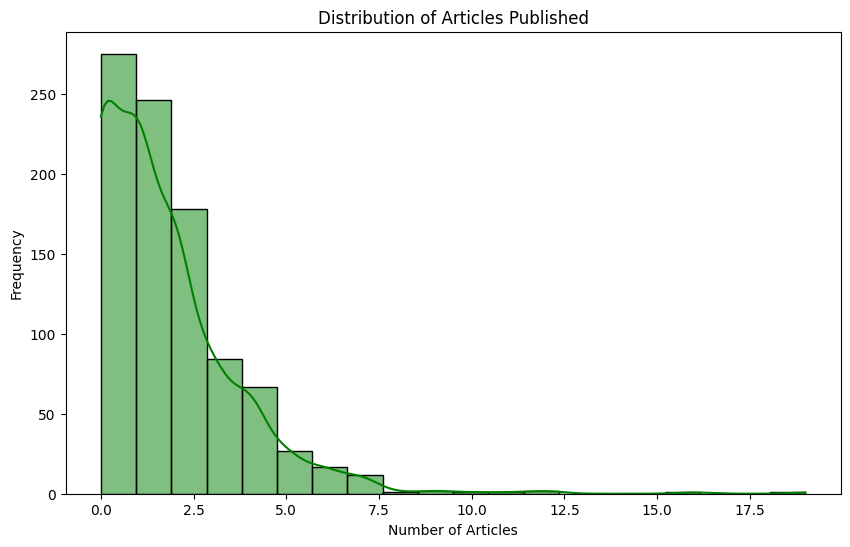

In [ ]:

# Plotting the distribution of 'articles' with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['articles'], bins=20, kde=True, color='green')
plt.title('Distribution of Articles Published')
plt.xlabel('Number of Articles')
plt.ylabel('Frequency')
plt.show()


### 4. Top 30 Largest Values and Visualization

<ipython-input-5-35e12da54b65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_articles['rownames'], y=top_30_articles['articles'], palette='viridis')


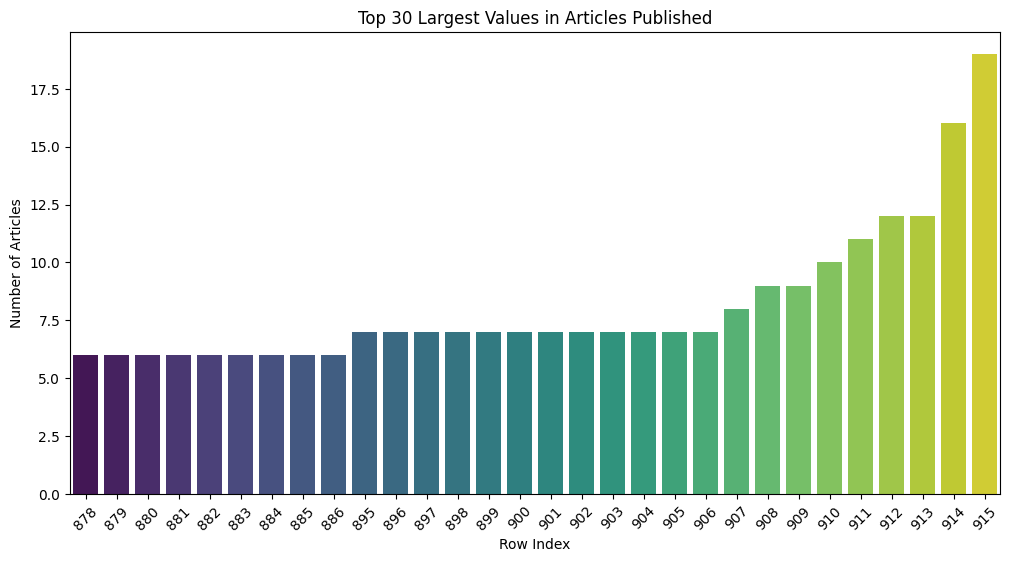

In [ ]:

# Displaying and plotting top 30 largest values in 'articles'
top_30_articles = data.nlargest(30, 'articles')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_articles['rownames'], y=top_30_articles['articles'], palette='viridis')
plt.title('Top 30 Largest Values in Articles Published')
plt.xlabel('Row Index')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


### 5. Box Plots and FacetGrid Visualizations

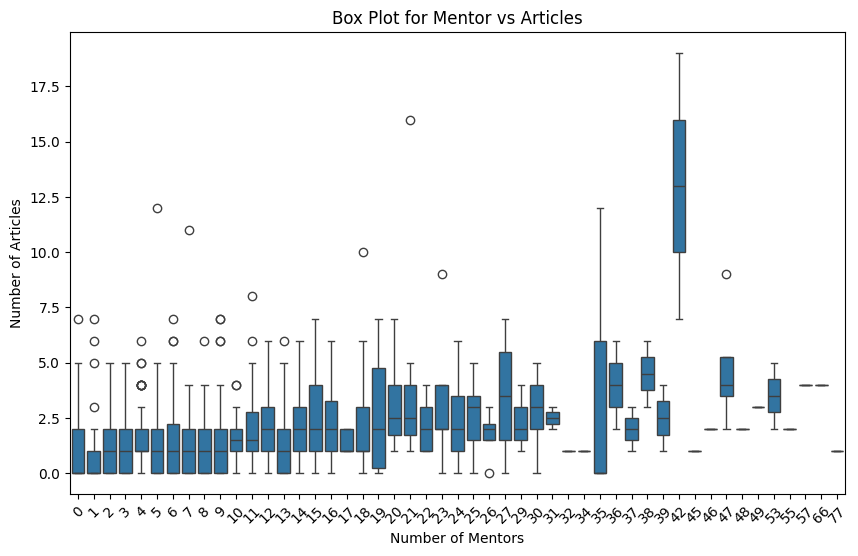

In [ ]:

# Box plot for 'mentor' vs 'articles'
plt.figure(figsize=(10, 6))
sns.boxplot(x='mentor', y='articles', data=data)
plt.title('Box Plot for Mentor vs Articles')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


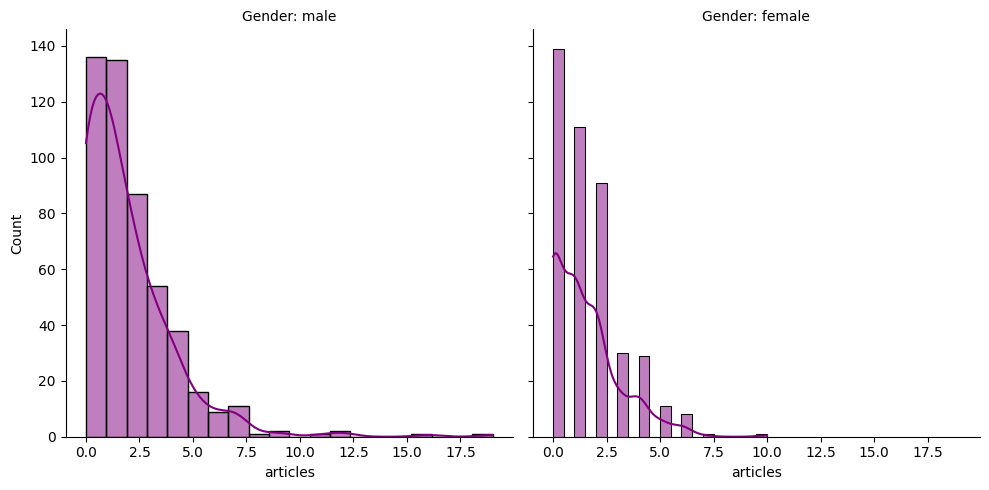

In [ ]:

# FacetGrid for 'articles' and 'gender'
g = sns.FacetGrid(data, col='gender', height=5, aspect=1)
g.map(sns.histplot, 'articles', bins=20, kde=True, color='purple')
g.set_titles('Gender: {col_name}')
plt.show()


# Module 3: Comprehensive Analysis - Bivariate Analysis

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook section covers the detailed Bivariate Analysis of the dataset.

### 1. Scatter Plots and Correlation Analysis

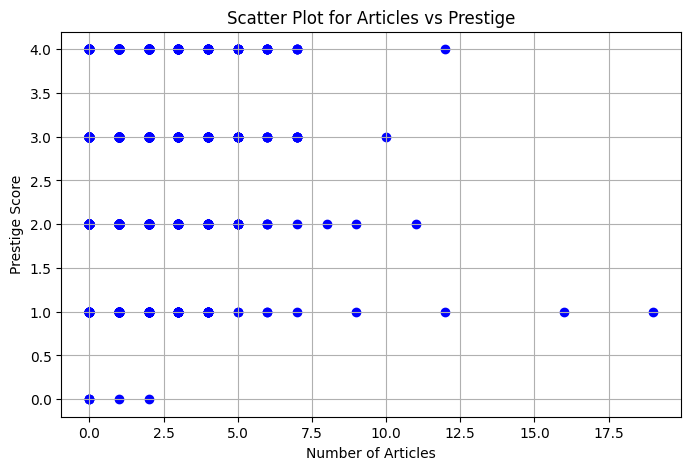

Correlation between 'articles' and 'prestige': 0.04
p-value: 2.11e-01


In [ ]:

# Scatter plot for 'articles' vs 'prestige'
plt.figure(figsize=(8, 5))
plt.scatter(data['articles'], data['prestige'], color='blue')
plt.title('Scatter Plot for Articles vs Prestige')
plt.xlabel('Number of Articles')
plt.ylabel('Prestige Score')
plt.grid(True)
plt.show()

# Calculating correlation coefficient
corr_articles_prestige = stats.pearsonr(data['articles'], data['prestige'])
print(f"Correlation between 'articles' and 'prestige': {corr_articles_prestige[0]:.2f}")
print(f"p-value: {corr_articles_prestige[1]:.2e}")


### 2. Box Plots for Categorical and Numerical Variables

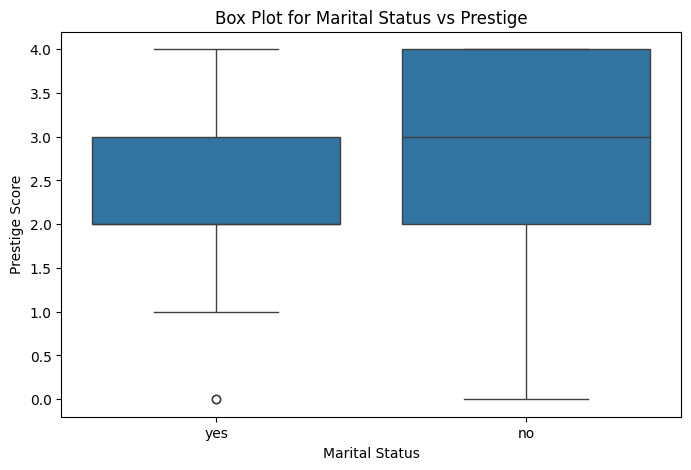

In [ ]:

# Box plot for 'married' vs 'prestige'
plt.figure(figsize=(8, 5))
sns.boxplot(x='married', y='prestige', data=data)
plt.title('Box Plot for Marital Status vs Prestige')
plt.xlabel('Marital Status')
plt.ylabel('Prestige Score')
plt.show()


### 3. Heatmap for Correlation Analysis

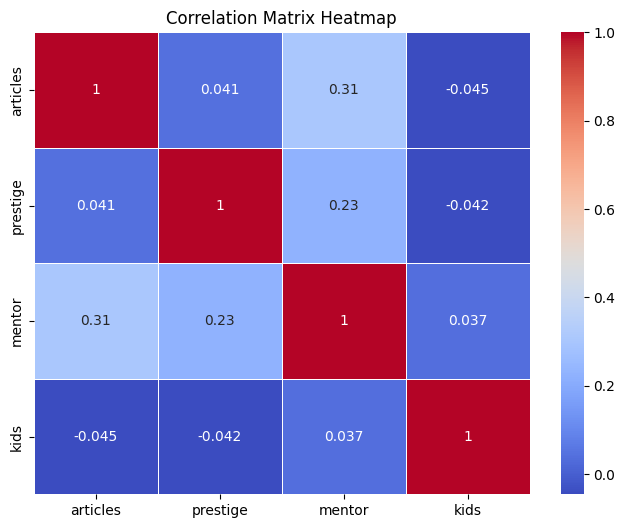

In [ ]:

# Calculating and visualizing the correlation matrix heatmap
correlation_matrix = data[['articles', 'prestige', 'mentor', 'kids']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Module 3: Comprehensive Analysis - Multivariate Analysis

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook section covers the detailed Multivariate Analysis of the dataset.

### 1. Pair Plot Analysis

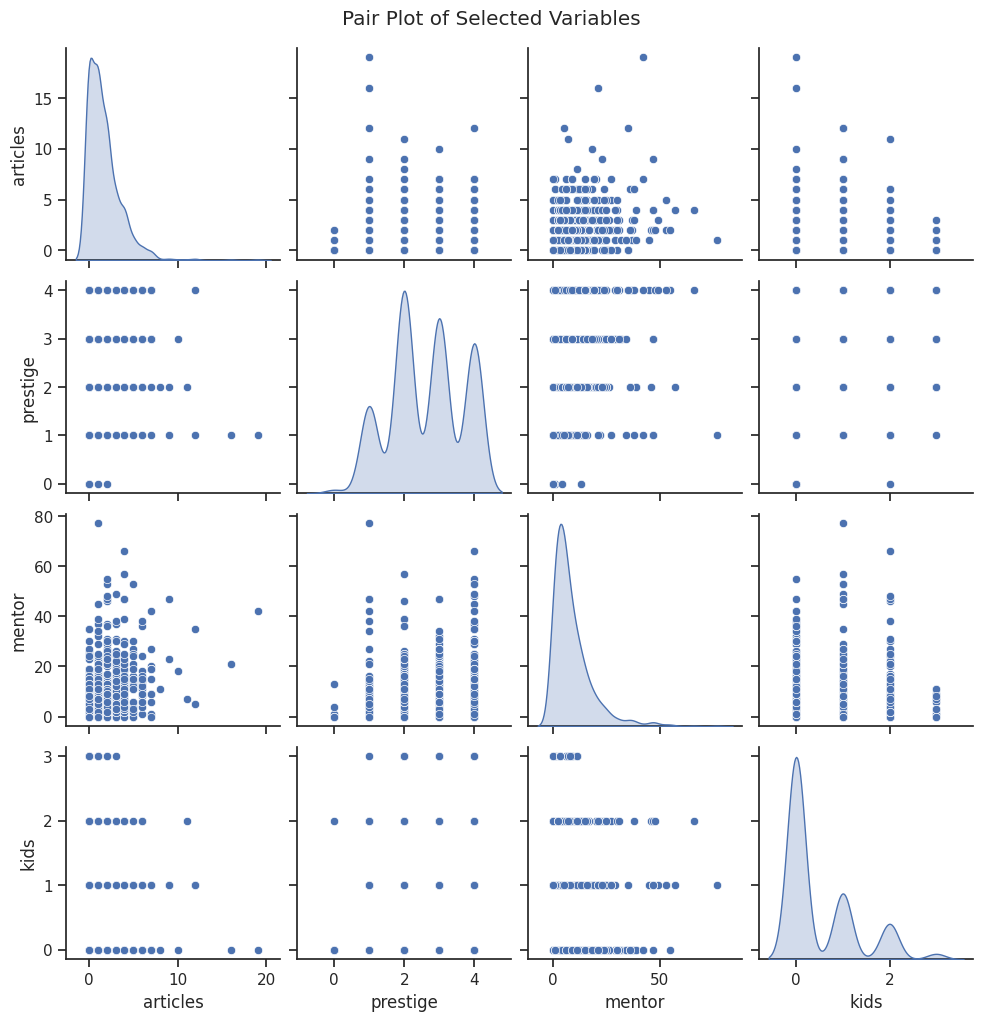

In [ ]:

# Pair plot for selected variables with hue
sns.set(style='ticks', color_codes=True)
sns.pairplot(data[['articles', 'prestige', 'mentor', 'kids']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


### 2. Pair Plot with Regression Lines

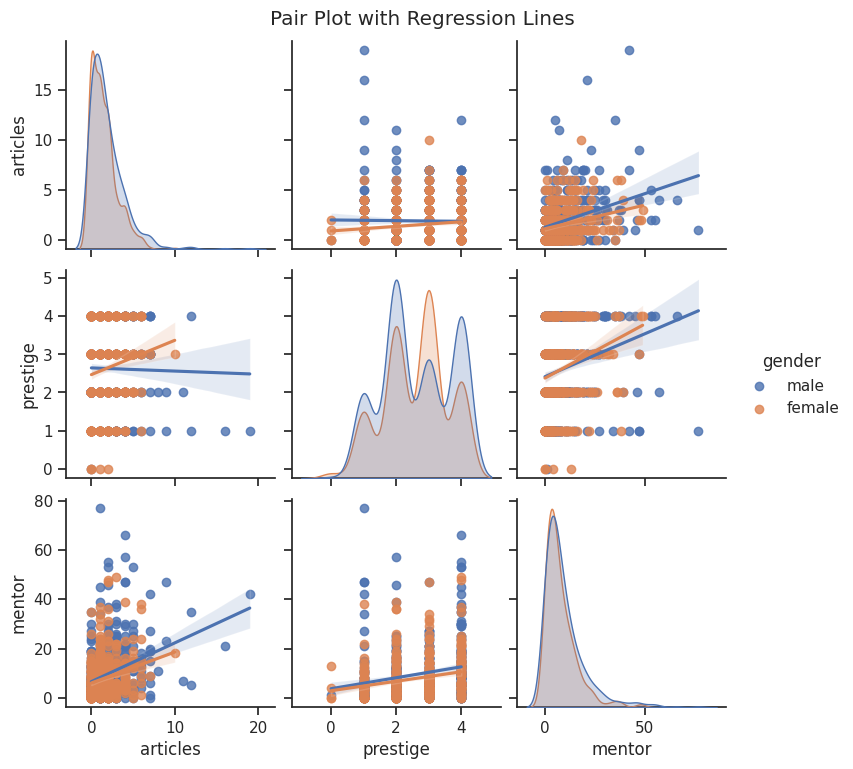

In [ ]:

# Pair plot with regression lines
sns.pairplot(data, vars=['articles', 'prestige', 'mentor'], kind='reg', hue='gender')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()


### 3. Complete Correlation Analysis

In [ ]:

# Calculating correlation for all numerical columns using Pearson method
correlation_all = data.corr(method='pearson', numeric_only=True)
correlation_all


rownames  articles      kids  prestige    mentor
rownames  1.000000  0.840483 -0.050011  0.088579  0.277449
articles  0.840483  1.000000 -0.045214  0.041382  0.305862
kids     -0.050011 -0.045214  1.000000 -0.042446  0.037020
prestige  0.088579  0.041382 -0.042446  1.000000  0.226428
mentor    0.277449  0.305862  0.037020  0.226428  1.000000

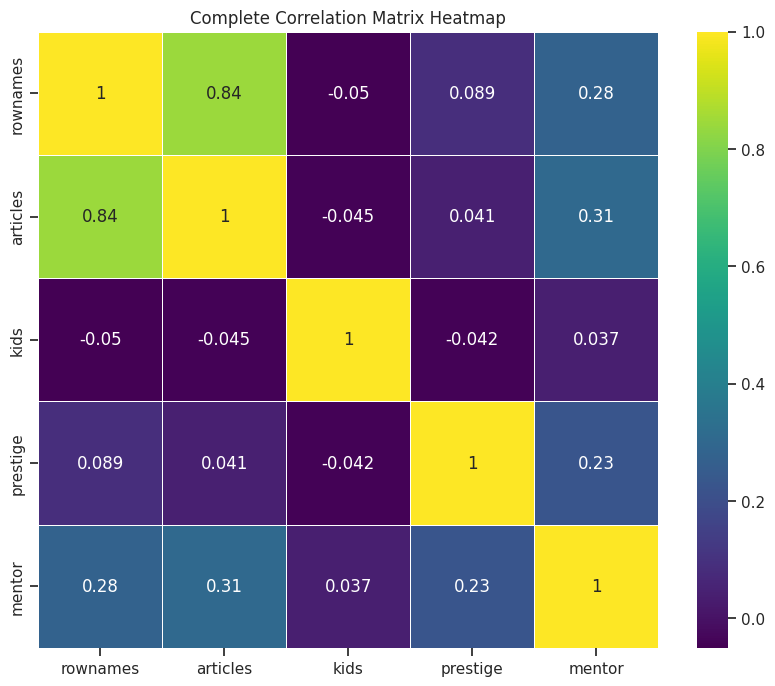

In [ ]:

# Plotting heatmap for complete correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Complete Correlation Matrix Heatmap')
plt.show()


# Module 3: Time Series Analysis (Synthetic Time Index)

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This section covers Time Series Analysis (TSA) using a synthetic time index.

### 1. Creating a Synthetic Time Index

In [ ]:

# Creating a synthetic time index
data['time_index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('time_index', inplace=True)

# Displaying the dataset with synthetic time index
data.head()


rownames  articles  gender married  kids  prestige  mentor
time_index                                                            
2020-01-01         1         0    male     yes     0         2       7
2020-01-02         2         0  female      no     0         2       6
2020-01-03         3         0  female      no     0         3       6
2020-01-04         4         0    male     yes     1         1       3
2020-01-05         5         0  female      no     0         3      26

### 2. Basic Time Series Plot

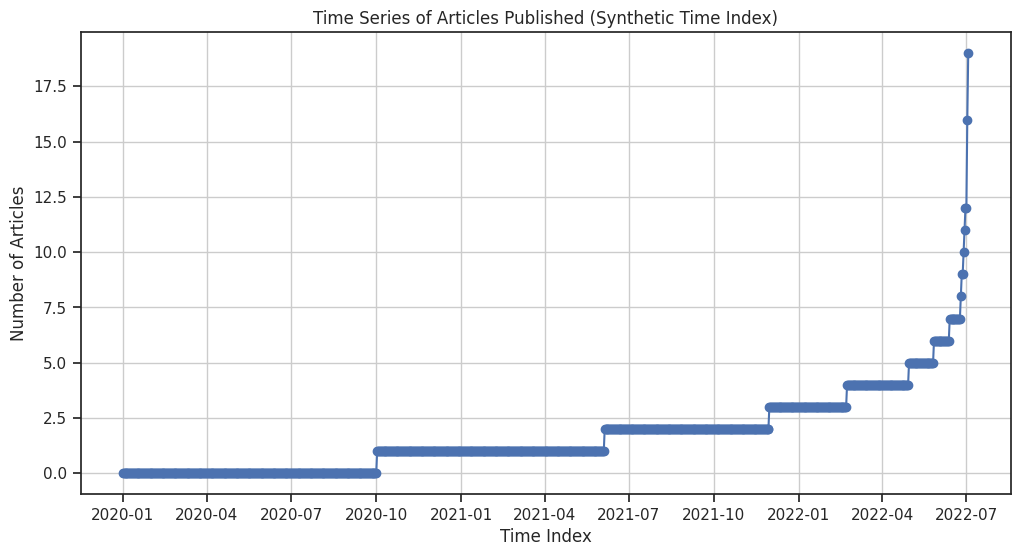

In [ ]:

# Basic time series plot of 'articles' over synthetic time index
plt.figure(figsize=(12, 6))
plt.plot(data['articles'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Articles Published (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


### 3. Resampling and Rolling Mean Analysis

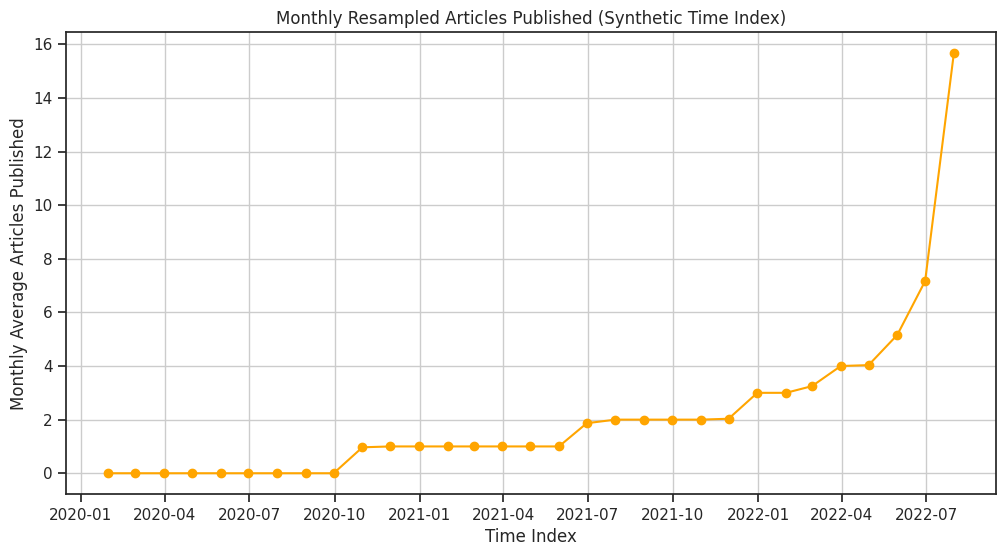

In [ ]:

# Resampling the data to monthly frequency and calculating mean
monthly_articles = data['articles'].resample('M').mean()

# Plotting the monthly resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_articles, marker='o', color='orange')
plt.title('Monthly Resampled Articles Published (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Monthly Average Articles Published')
plt.grid(True)
plt.show()


### 4. Rolling Statistics for Trend Analysis

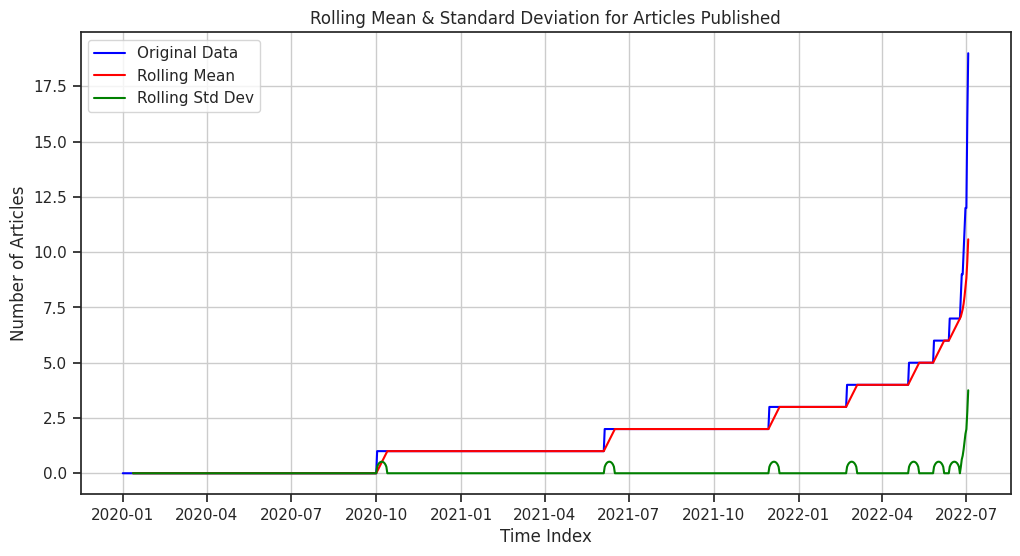

In [ ]:

# Calculating rolling mean and standard deviation
rolling_mean = data['articles'].rolling(window=12).mean()
rolling_std = data['articles'].rolling(window=12).std()

# Plotting rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['articles'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean & Standard Deviation for Articles Published')
plt.xlabel('Time Index')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


### 5. Seasonal Decomposition

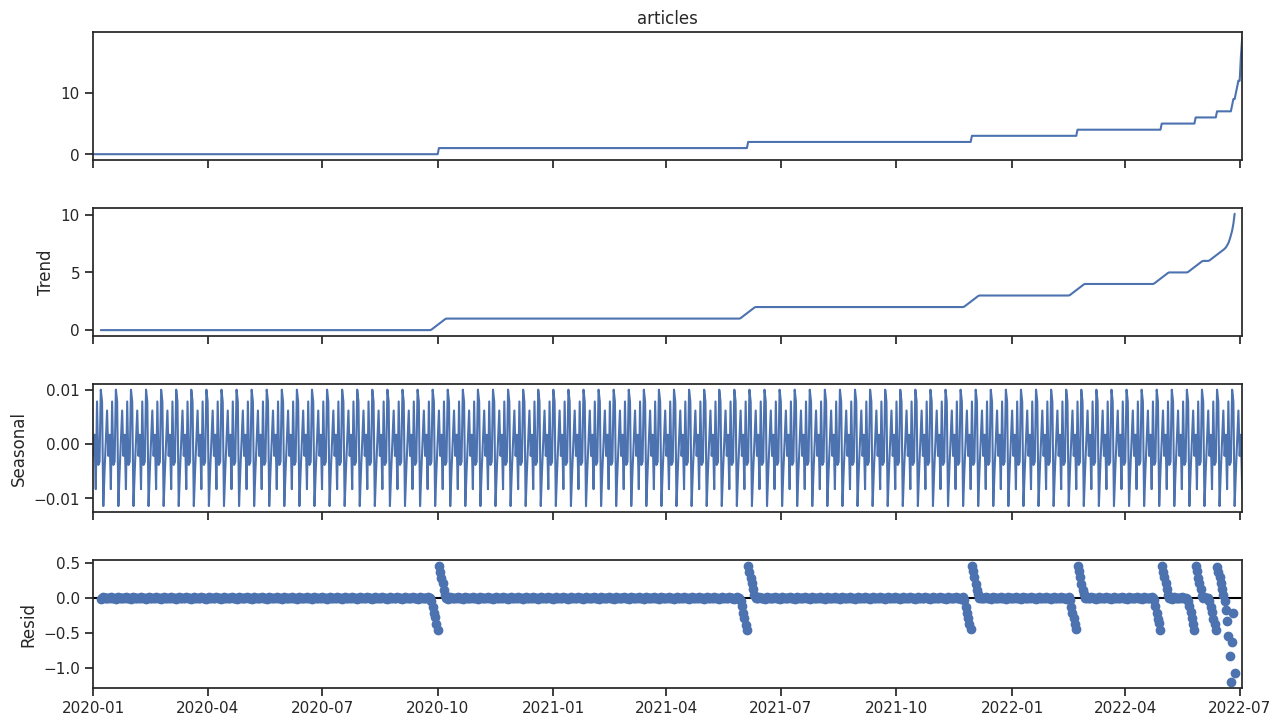

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of time series
decomposition = seasonal_decompose(data['articles'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()


## Conclusion
This section provides a detailed Time Series Analysis using a synthetic time index for the dataset.

<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_4_Data_Summarization_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Data Summarization and Visualization

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This module covers statistical summary measures, data elaboration, and 1-D, 2-D, and n-D statistical data analysis, as well as various visualization techniques including scatter plots, dot charts, and bar plots.

### 1. Statistical Summary Measures

In [ ]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)

# Displaying the statistical summary of the dataset
summary = data.describe()
summary


rownames    articles        kids    prestige      mentor
count  915.000000  915.000000  915.000000  915.000000  915.000000
mean   458.000000    1.692896    0.495082    3.103109    8.767213
std    264.282046    1.926069    0.764880    0.984249    9.483916
min      1.000000    0.000000    0.000000    0.755000    0.000000
25%    229.500000    0.000000    0.000000    2.260000    3.000000
50%    458.000000    1.000000    0.000000    3.150000    6.000000
75%    686.500000    2.000000    1.000000    3.920000   12.000000
max    915.000000   19.000000    3.000000    4.620000   77.000000

### 2. Data Elaboration

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate additional statistical measures
data_summary = pd.DataFrame({
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Variance': numeric_data.var(),
    'Standard Deviation': numeric_data.std(),
    'Skewness': numeric_data.skew(),
    'Kurtosis': numeric_data.kurt()
})

# Display the detailed summary for numeric columns only
data_summary


Mean  Median      Variance  Standard Deviation  Skewness  \
rownames  458.000000  458.00  69845.000000          264.282046  0.000000   
articles    1.692896    1.00      3.709742            1.926069  2.523059   
kids        0.495082    0.00      0.585041            0.764880  1.376507   
prestige    3.103109    3.15      0.968746            0.984249 -0.122416   
mentor      8.767213    6.00     89.944657            9.483916  2.427070   

           Kurtosis  
rownames  -1.200000  
articles  12.738989  
kids       0.906460  
prestige  -1.074660  
mentor     8.449724

### 3. 1-D Statistical Data Analysis

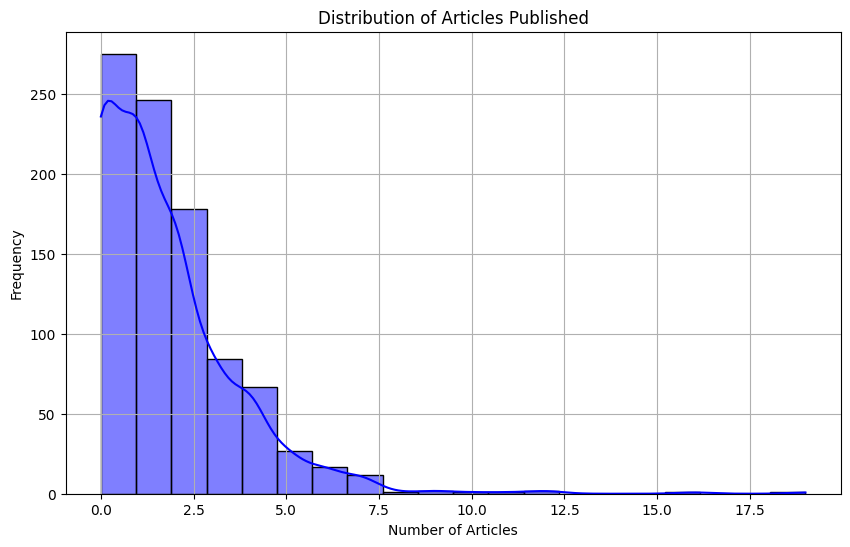

In [ ]:

# 1-D Analysis: Distribution plots for 'articles'
plt.figure(figsize=(10, 6))
sns.histplot(data['articles'], bins=20, kde=True, color='blue')
plt.title('Distribution of Articles Published')
plt.xlabel('Number of Articles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### 4. 2-D Statistical Data Analysis

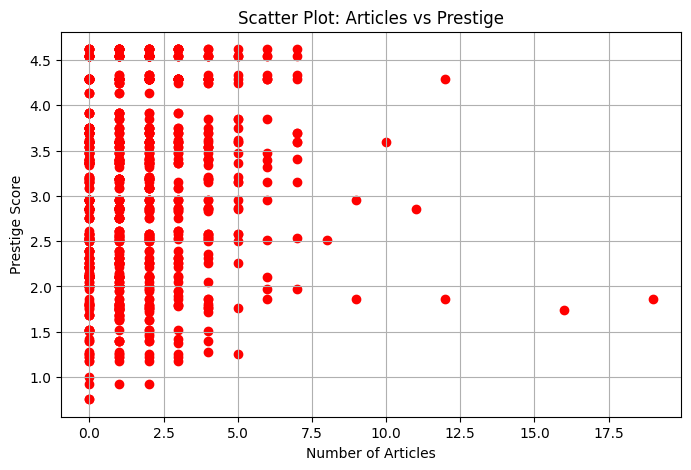

In [ ]:

# 2-D Analysis: Scatter plot for 'articles' vs 'prestige'
plt.figure(figsize=(8, 5))
plt.scatter(data['articles'], data['prestige'], color='red')
plt.title('Scatter Plot: Articles vs Prestige')
plt.xlabel('Number of Articles')
plt.ylabel('Prestige Score')
plt.grid(True)
plt.show()


### 5. n-D Statistical Data Analysis

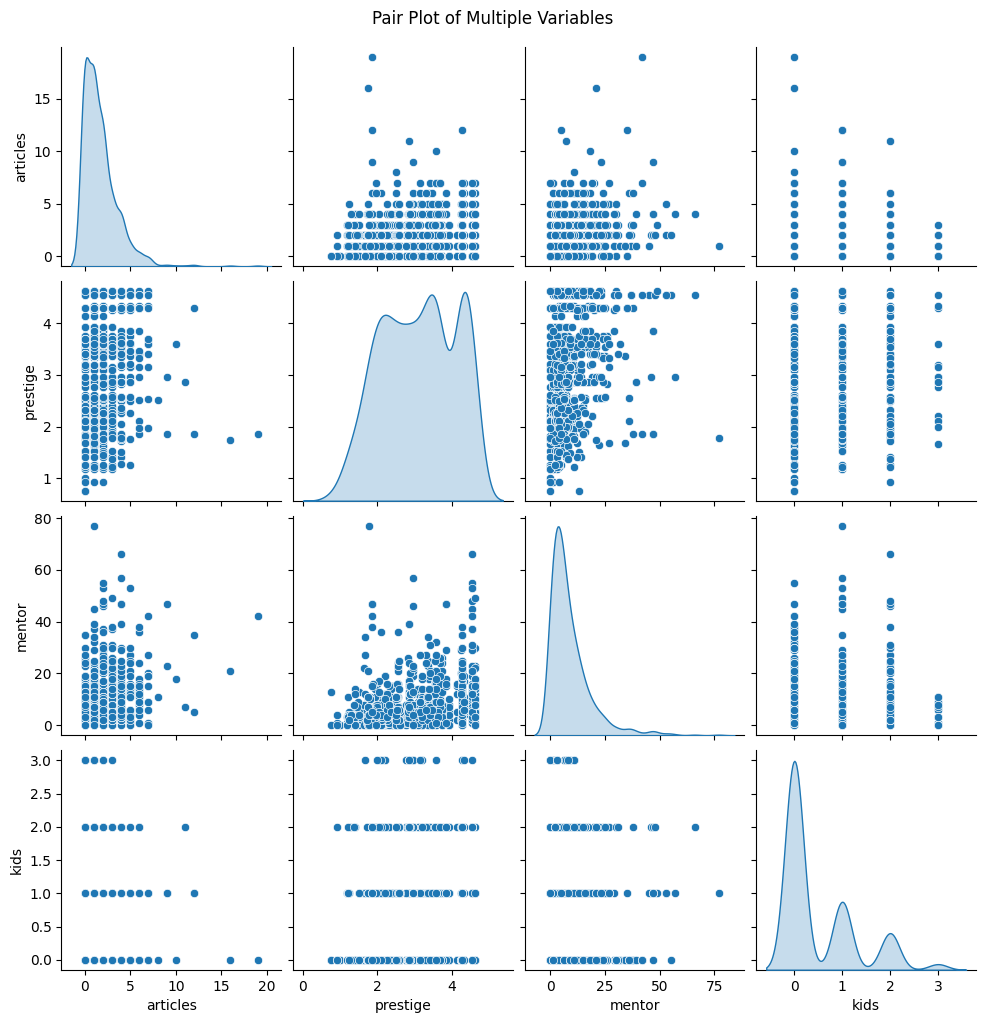

In [ ]:

# n-D Analysis: Pair plot for multiple variables
sns.pairplot(data[['articles', 'prestige', 'mentor', 'kids']], diag_kind='kde')
plt.suptitle('Pair Plot of Multiple Variables', y=1.02)
plt.show()


### 6. Contingency Tables

In [ ]:

# Creating a contingency table for 'mentor' and 'married'
contingency_table = pd.crosstab(data['mentor'], data['married'])
contingency_table


married  no  yes
mentor          
0        28   62
1        10   42
2        28   51
3        24   46
4        23   49
5        24   53
6        24   28
7        13   31
8        15   32
9        16   16
10       14   18
11        9   25
12       12   15
13        5   16
14       11   12
15        9   10
16        3   13
17        3    6
18        6    8
19        5    9
20        1    3
21        3    9
22        2    4
23        2    3
24        1    7
25        3    4
26        3    1
27        0    4
29        1    2
30        1    4
31        0    2
32        0    1
34        1    1
35        2    1
36        1    1
37        2    1
38        0    2
39        1    1
42        1    1
45        0    1
46        0    1
47        1    3
48        0    1
49        0    1
53        0    2
55        1    0
57        0    1
66        0    1
77        0    1

### 7. Visualization: Scatter Plots, Dot Charts, and Bar Plots

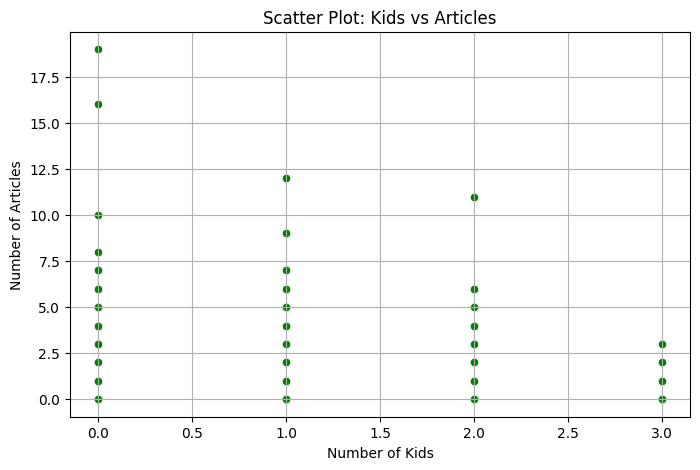

In [ ]:

# Scatter plot for 'kids' vs 'articles'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='kids', y='articles', data=data, color='green')
plt.title('Scatter Plot: Kids vs Articles')
plt.xlabel('Number of Kids')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


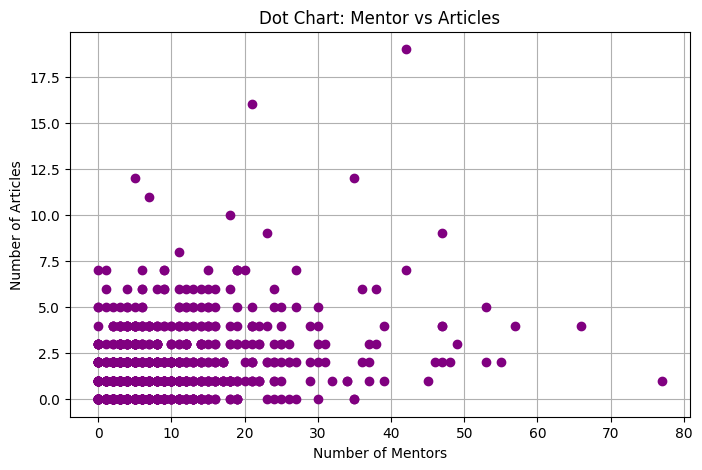

In [ ]:

# Dot chart for 'mentor' vs 'articles'
plt.figure(figsize=(8, 5))
plt.plot(data['mentor'], data['articles'], 'o', color='purple')
plt.title('Dot Chart: Mentor vs Articles')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


<ipython-input-10-5cb43f58a8b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mentor', y='articles', data=data, palette='viridis')


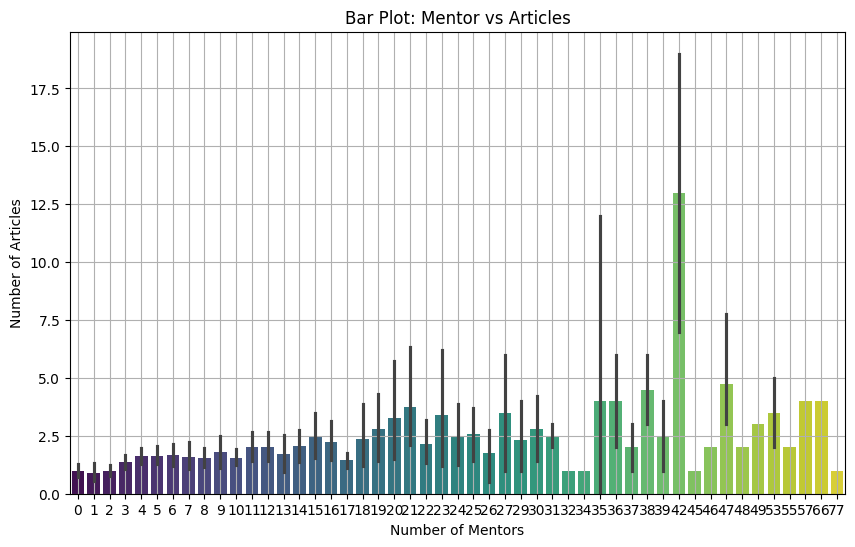

In [ ]:

# Bar plot for 'mentor' vs 'articles'
plt.figure(figsize=(10, 6))
sns.barplot(x='mentor', y='articles', data=data, palette='viridis')
plt.title('Bar Plot: Mentor vs Articles')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


## Conclusion
This module provides detailed statistical analysis and visualization techniques for the given dataset, covering various dimensions and graphical representations.

# Module 4: Data Summarization and Visualization (Expanded Part 1)

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook provides a detailed statistical analysis of the dataset, covering a wide range of techniques and visualizations.

### 1. Expanded Statistical Summary Measures

In [ ]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate additional statistical measures
data_summary = pd.DataFrame({
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Variance': numeric_data.var(),
    'Standard Deviation': numeric_data.std(),
    'Skewness': numeric_data.skew(),
    'Kurtosis': numeric_data.kurt()
})

# Display the detailed summary for numeric columns only
data_summary



Mean  Median      Variance  Standard Deviation  Skewness  \
rownames  458.000000  458.00  69845.000000          264.282046  0.000000   
articles    1.692896    1.00      3.709742            1.926069  2.523059   
kids        0.495082    0.00      0.585041            0.764880  1.376507   
prestige    3.103109    3.15      0.968746            0.984249 -0.122416   
mentor      8.767213    6.00     89.944657            9.483916  2.427070   

           Kurtosis  
rownames  -1.200000  
articles  12.738989  
kids       0.906460  
prestige  -1.074660  
mentor     8.449724

### 2. Data Elaboration: Distribution and Outliers

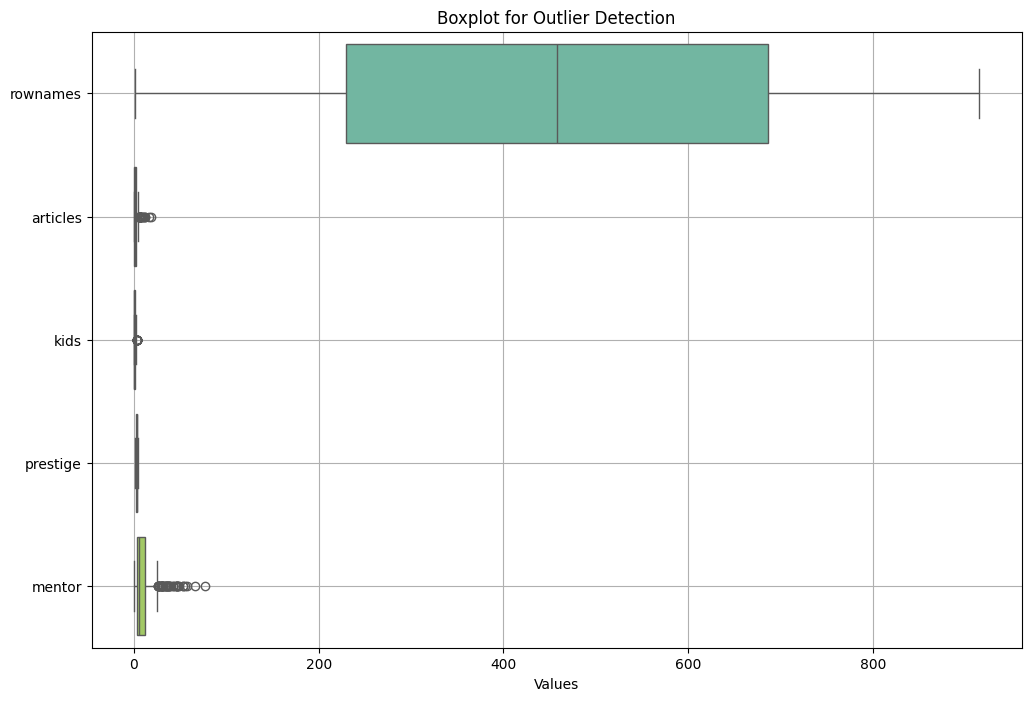

In [ ]:

# Detecting and visualizing outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Values')
plt.grid(True)
plt.show()


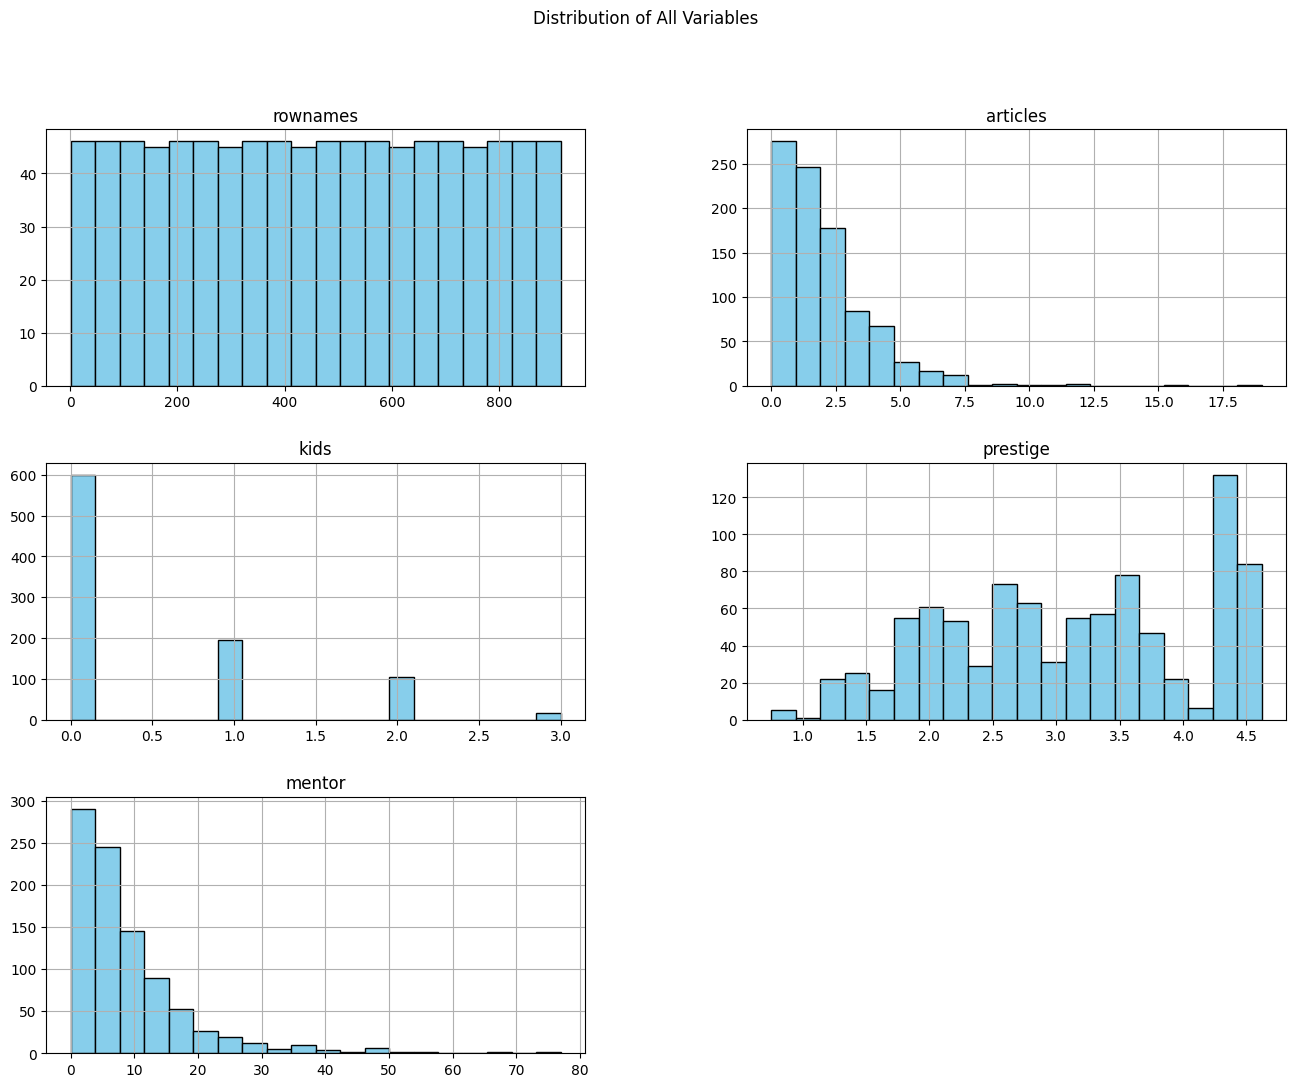

In [ ]:

# Visualizing the distribution of each column using histograms
data.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of All Variables')
plt.show()


### 3. 1-D Statistical Data Analysis (Expanded)

<ipython-input-15-154677c178d0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['articles'], shade=True, color='purple', label='Articles')
<ipython-input-15-154677c178d0>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['prestige'], shade=True, color='orange', label='Prestige')


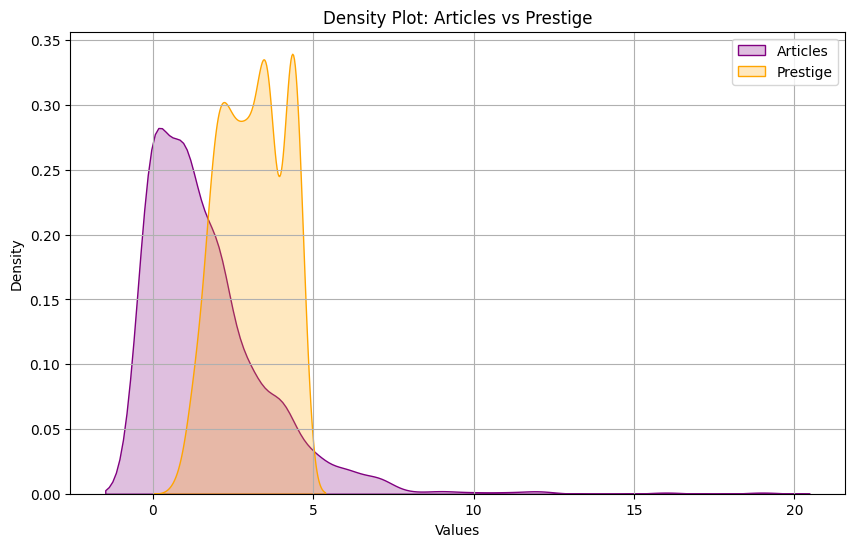

In [ ]:

# 1-D Analysis: Density plots for 'articles' and 'prestige'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['articles'], shade=True, color='purple', label='Articles')
sns.kdeplot(data['prestige'], shade=True, color='orange', label='Prestige')
plt.title('Density Plot: Articles vs Prestige')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


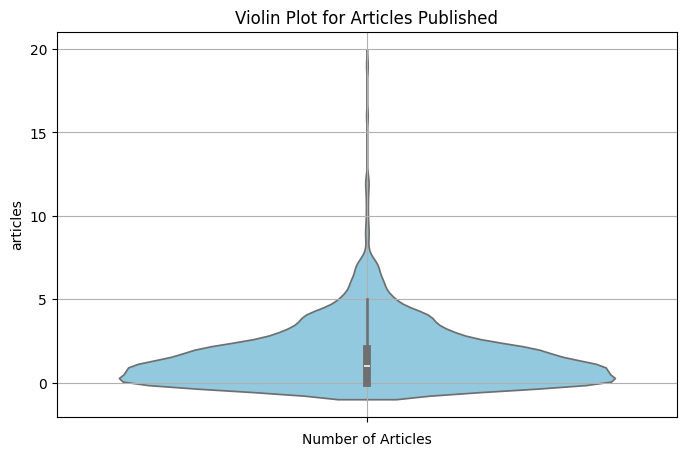

In [ ]:

# Violin plot for 'articles' to show distribution and probability density
plt.figure(figsize=(8, 5))
sns.violinplot(data['articles'], color='skyblue')
plt.title('Violin Plot for Articles Published')
plt.xlabel('Number of Articles')
plt.grid(True)
plt.show()


### 4. 2-D Statistical Data Analysis (Expanded)

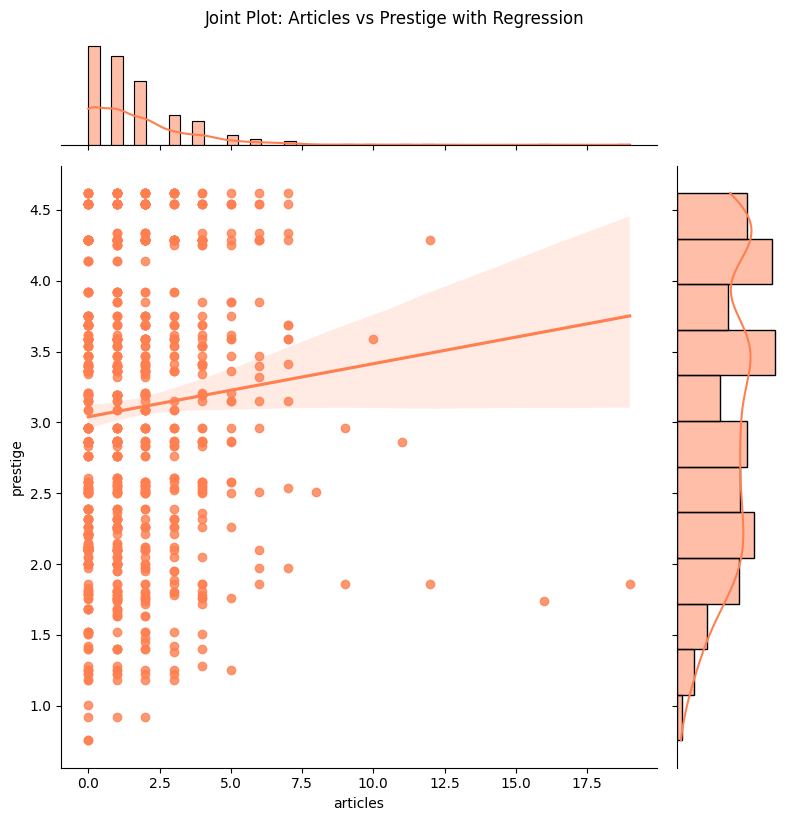

In [ ]:

# 2-D Analysis: Joint plot for 'articles' vs 'prestige' with regression
sns.jointplot(x='articles', y='prestige', data=data, kind='reg', height=8, color='coral')
plt.suptitle('Joint Plot: Articles vs Prestige with Regression', y=1.02)
plt.show()


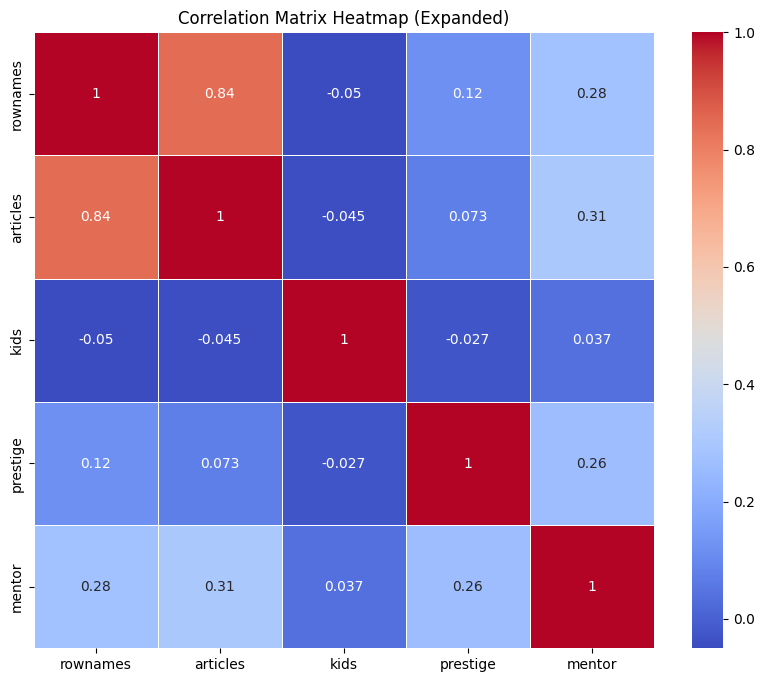

In [ ]:
# Select only numeric columns for correlation
numeric_columns = data.select_dtypes(include=[np.number])

# Plotting the heatmap for correlation matrix with numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Expanded)')
plt.show()

### 5. n-D Statistical Data Analysis (Expanded)

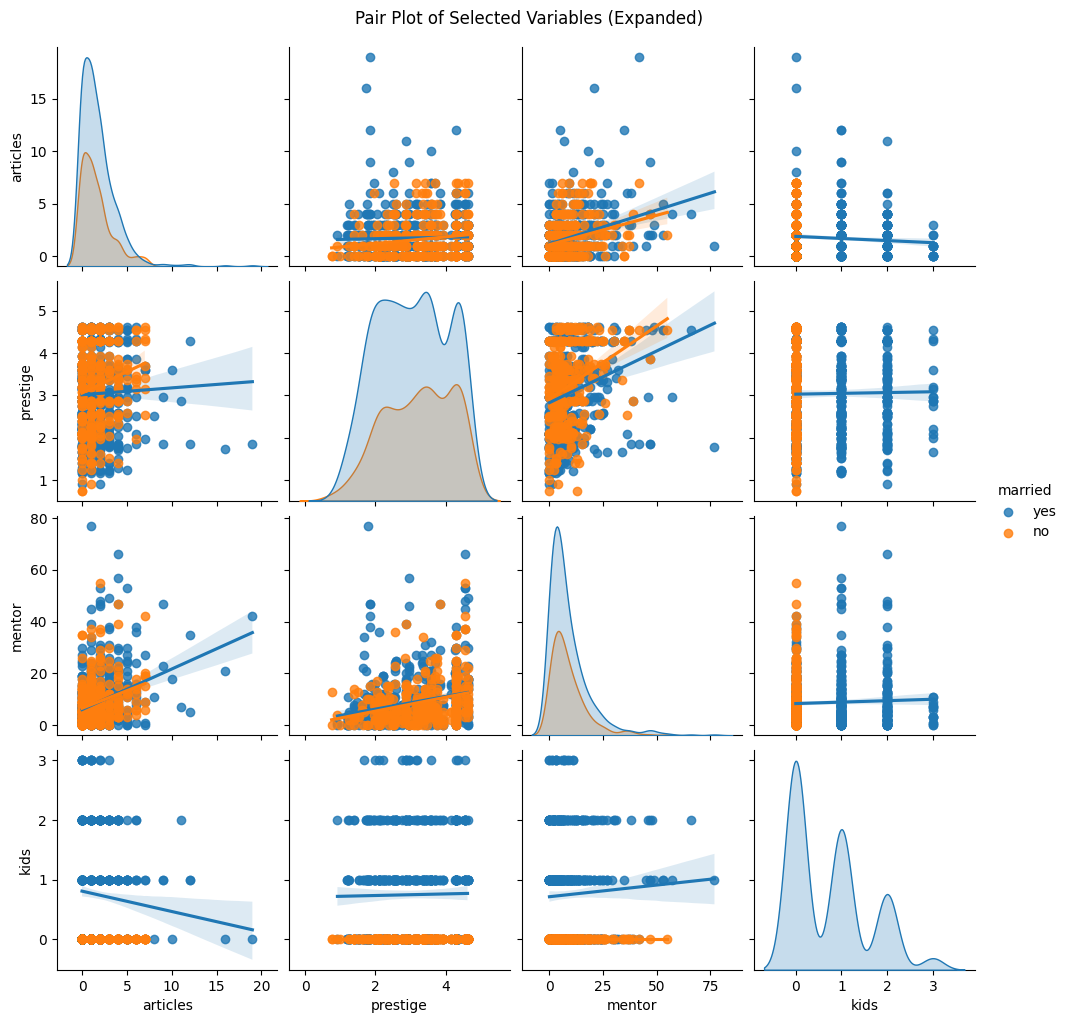

In [ ]:

# n-D Analysis: Pairplot for selected variables with regression and hue
sns.pairplot(data, vars=['articles', 'prestige', 'mentor', 'kids'], hue='married', kind='reg')
plt.suptitle('Pair Plot of Selected Variables (Expanded)', y=1.02)
plt.show()


### 6. Advanced Contingency Tables

In [ ]:

# Contingency table for 'mentor' and 'married' with margins
contingency_table_expanded = pd.crosstab(data['mentor'], data['married'], margins=True, margins_name='Total')
contingency_table_expanded


married   no  yes  Total
mentor                  
0         28   62     90
1         10   42     52
2         28   51     79
3         24   46     70
4         23   49     72
5         24   53     77
6         24   28     52
7         13   31     44
8         15   32     47
9         16   16     32
10        14   18     32
11         9   25     34
12        12   15     27
13         5   16     21
14        11   12     23
15         9   10     19
16         3   13     16
17         3    6      9
18         6    8     14
19         5    9     14
20         1    3      4
21         3    9     12
22         2    4      6
23         2    3      5
24         1    7      8
25         3    4      7
26         3    1      4
27         0    4      4
29         1    2      3
30         1    4      5
31         0    2      2
32         0    1      1
34         1    1      2
35         2    1      3
36         1    1      2
37         2    1      3
38         0    2      2
39         1    1      2
42         1    1      2
45         0    1      1
46         0    1      1
47         1    3      4
48         0    1      1
49         0    1      1
53         0    2      2
55         1    0      1
57         0    1      1
66         0    1      1
77         0    1      1
Total    309  606    915

### 7. Advanced Visualizations: Strip Plots and Boxen Plots

<ipython-input-26-ddbe52688beb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='mentor', y='articles', data=data, jitter=True, palette='Set1')


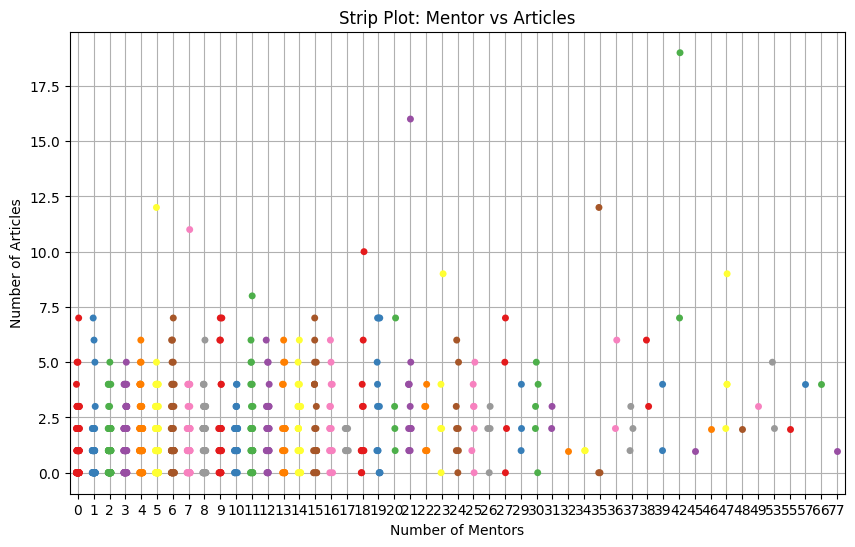

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='mentor', y='articles', data=data, jitter=True, palette='Set1')
plt.title('Strip Plot: Mentor vs Articles')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

<ipython-input-27-54e74846ba5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='mentor', y='articles', data=data, palette='Set2')


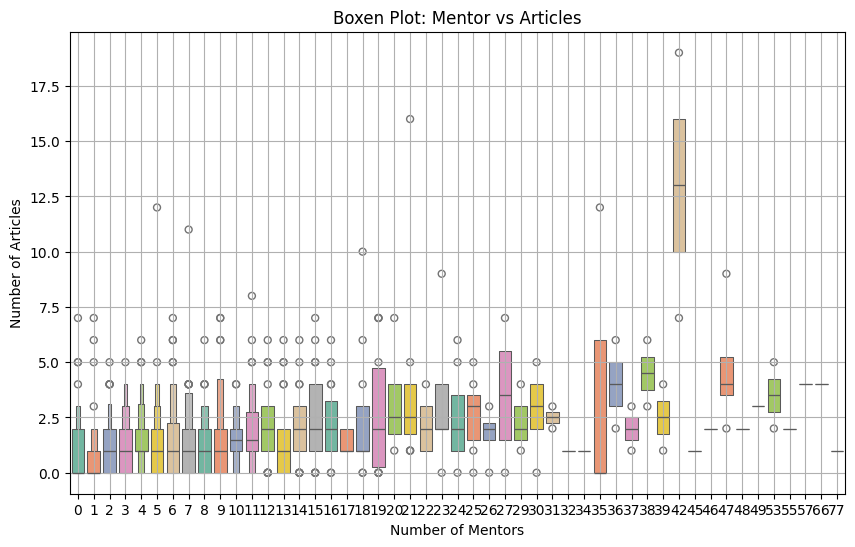

In [ ]:

# Boxen plot for 'mentor' vs 'articles'
plt.figure(figsize=(10, 6))
sns.boxenplot(x='mentor', y='articles', data=data, palette='Set2')
plt.title('Boxen Plot: Mentor vs Articles')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


## Conclusion
This notebook provides an expanded and detailed statistical analysis for the dataset, with various techniques and visualizations.

# Module 4: Data Summarization and Visualization (Expanded Part 2)

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook provides advanced visualization techniques and detailed data analysis using various graphical methods.

### 1. Advanced Scatter Plots

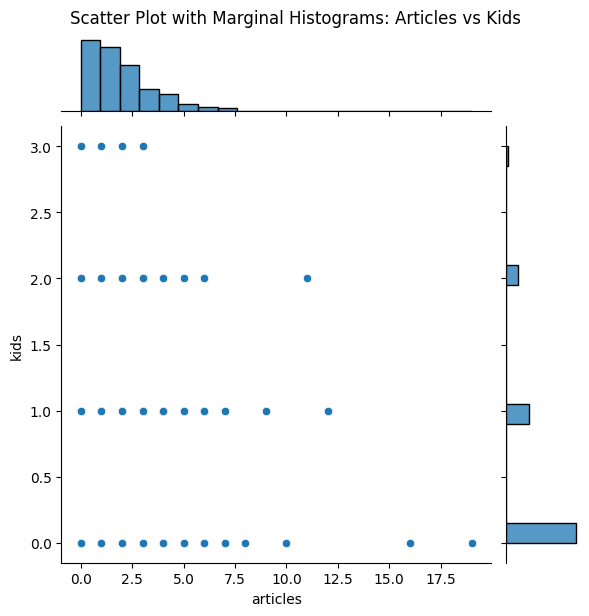

In [ ]:

# Scatter plot with marginal histograms for 'articles' and 'kids'
sns.jointplot(x='articles', y='kids', data=data, kind='scatter', marginal_kws=dict(bins=20, fill=True))
plt.suptitle('Scatter Plot with Marginal Histograms: Articles vs Kids', y=1.02)
plt.show()


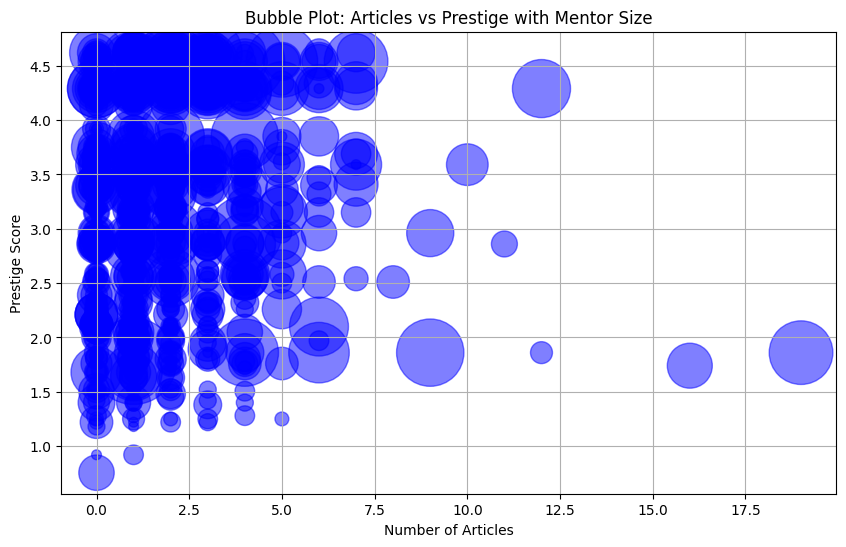

In [ ]:

# Bubble plot for 'articles' vs 'prestige' with bubble size as 'mentor'
plt.figure(figsize=(10, 6))
plt.scatter(data['articles'], data['prestige'], s=data['mentor']*50, alpha=0.5, c='blue')
plt.title('Bubble Plot: Articles vs Prestige with Mentor Size')
plt.xlabel('Number of Articles')
plt.ylabel('Prestige Score')
plt.grid(True)
plt.show()


### 2. Advanced Bar Plots and Dot Charts

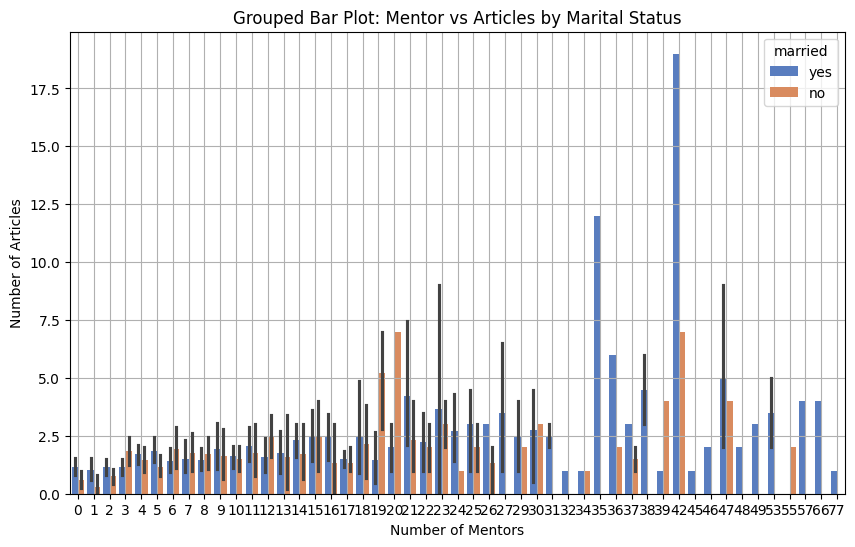

In [ ]:

# Grouped bar plot for 'married' and 'articles'
plt.figure(figsize=(10, 6))
sns.barplot(x='mentor', y='articles', hue='married', data=data, palette='muted')
plt.title('Grouped Bar Plot: Mentor vs Articles by Marital Status')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


<ipython-input-31-7ff8b870dc1a>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(data['mentor'], data['articles'], basefmt=" ", use_line_collection=True)


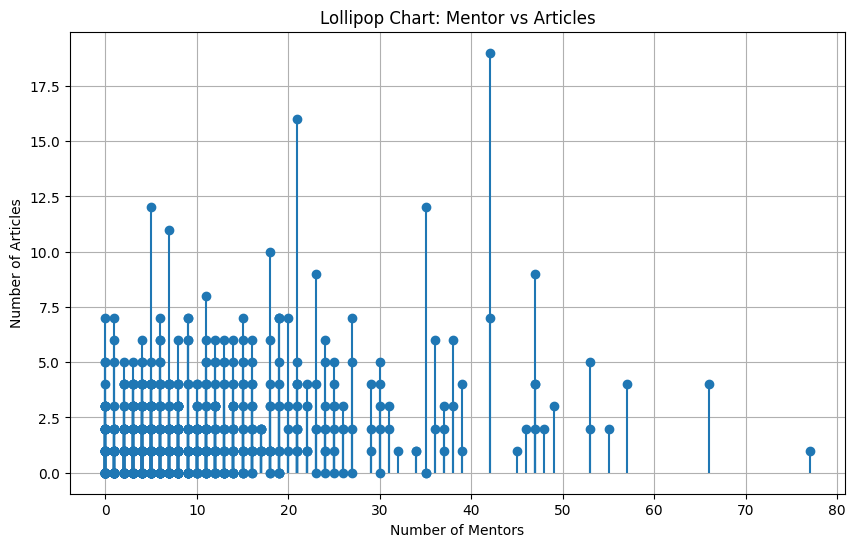

In [ ]:

# Lollipop chart for 'mentor' vs 'articles'
plt.figure(figsize=(10, 6))
plt.stem(data['mentor'], data['articles'], basefmt=" ", use_line_collection=True)
plt.title('Lollipop Chart: Mentor vs Articles')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


### 3. Advanced Heatmaps and Matrix Plots

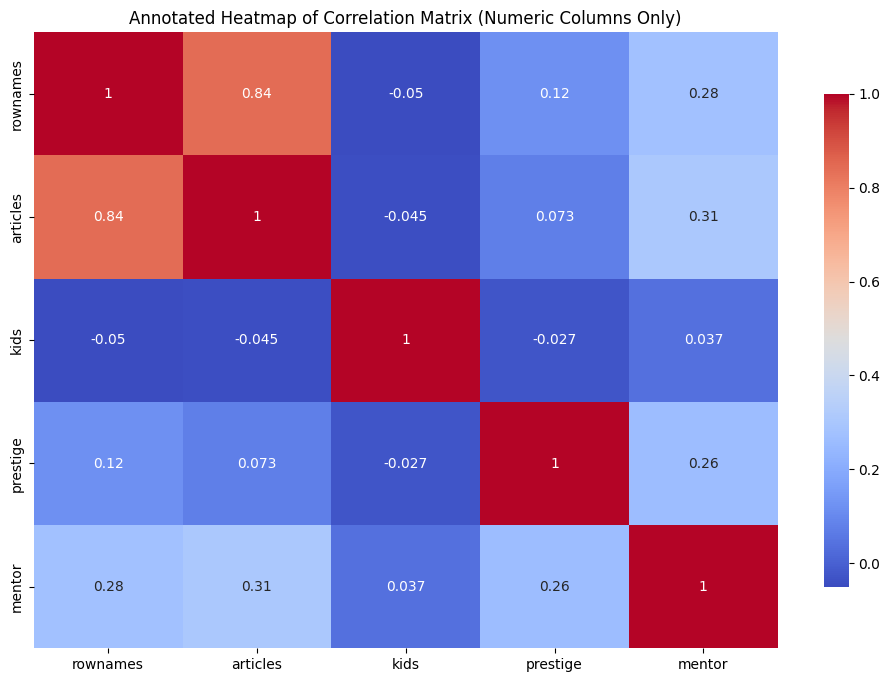

In [ ]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Plotting the heatmap for correlation matrix with numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', cbar_kws={"shrink": 0.8})
plt.title('Annotated Heatmap of Correlation Matrix (Numeric Columns Only)')
plt.show()

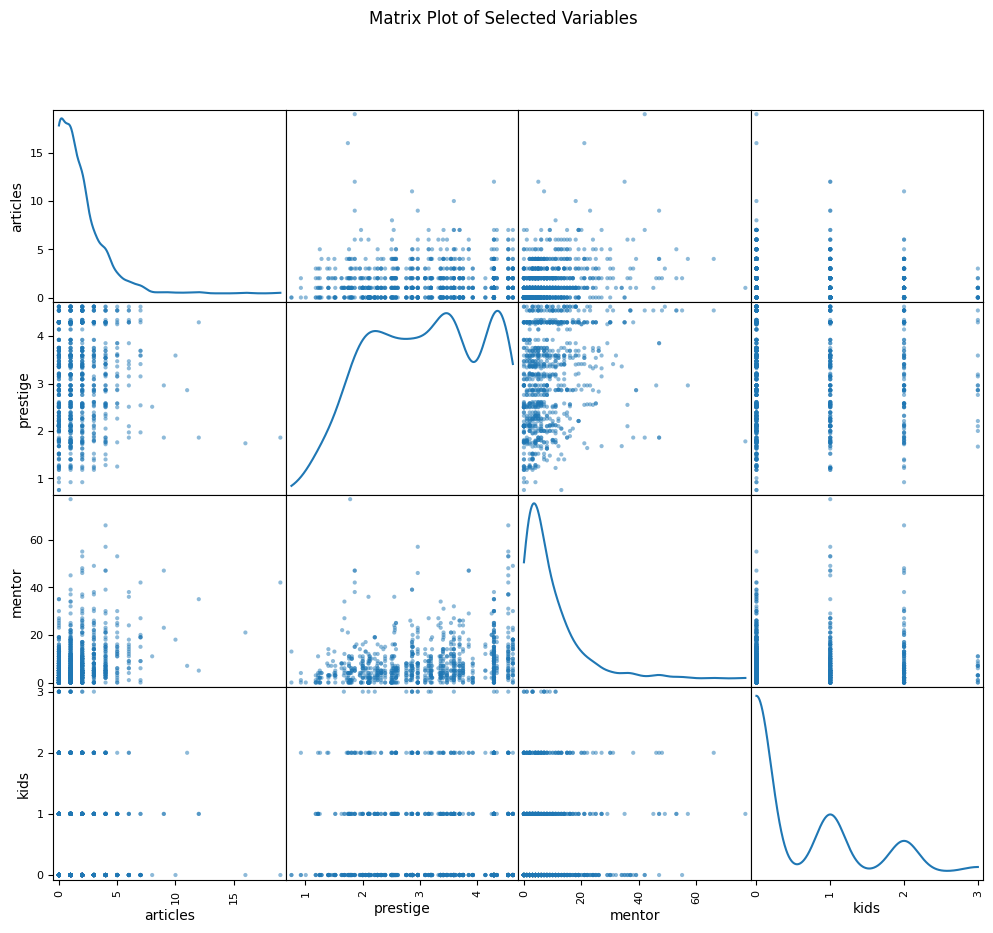

In [ ]:

# Matrix plot for relationships between selected variables
pd.plotting.scatter_matrix(data[['articles', 'prestige', 'mentor', 'kids']], figsize=(12, 10), diagonal='kde')
plt.suptitle('Matrix Plot of Selected Variables')
plt.show()


### 4. Violin and Strip Plots

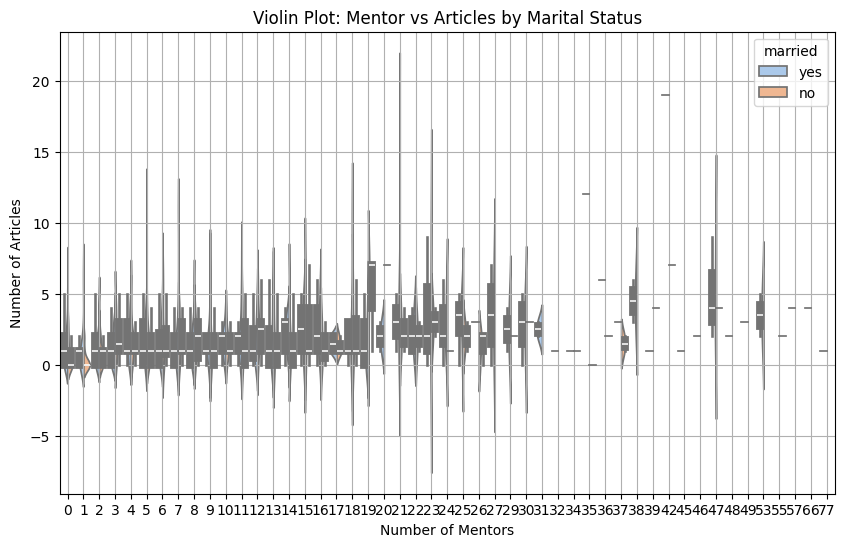

In [ ]:

# Violin plot for 'mentor' vs 'articles' with hue for 'married'
plt.figure(figsize=(10, 6))
sns.violinplot(x='mentor', y='articles', hue='married', data=data, split=True, palette='pastel')
plt.title('Violin Plot: Mentor vs Articles by Marital Status')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


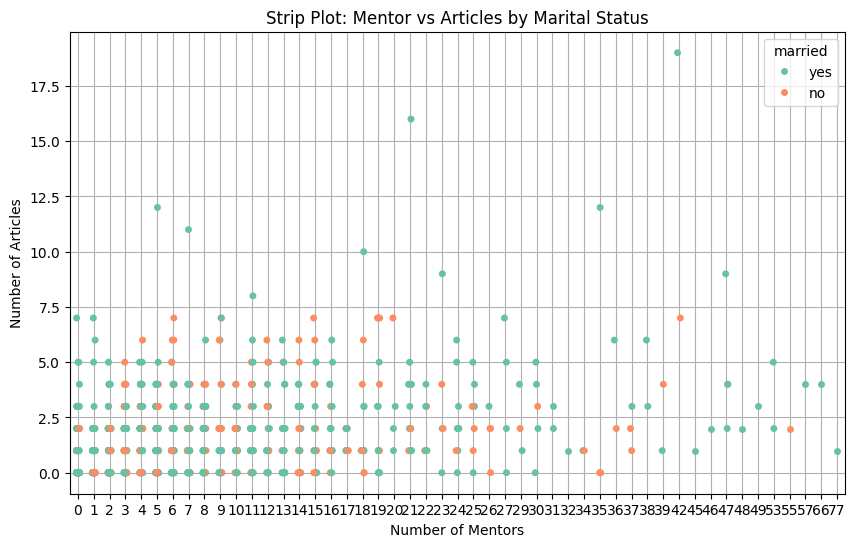

In [ ]:

# Strip plot for 'mentor' vs 'articles' with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='mentor', y='articles', data=data, jitter=True, hue='married', palette='Set2')
plt.title('Strip Plot: Mentor vs Articles by Marital Status')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


### 5. Facet Grids and Pair Plots

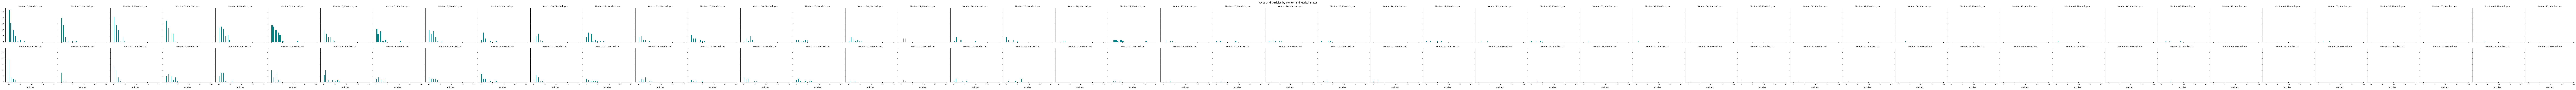

In [ ]:

# Facet grid for 'articles' by 'mentor' and 'married'
g = sns.FacetGrid(data, col='mentor', row='married', height=3, aspect=1.2)
g.map(plt.hist, 'articles', bins=20, color='teal')
g.set_titles('Mentor: {col_name}, Married: {row_name}')
plt.suptitle('Facet Grid: Articles by Mentor and Marital Status', y=1.02)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (49) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (49) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (49) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (49) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5

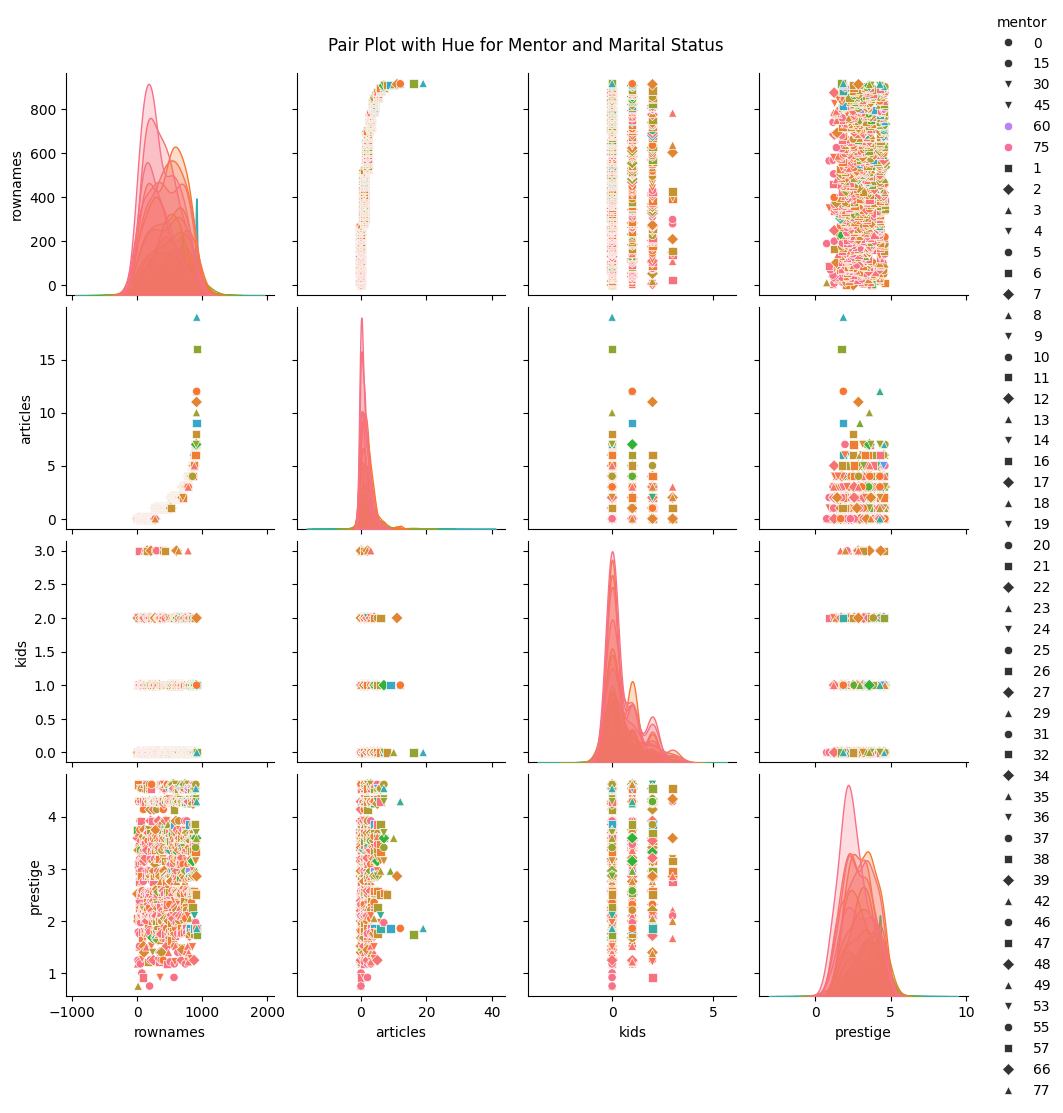

In [ ]:

# Pair plot with hue for 'mentor' and 'married' together
sns.pairplot(data, hue='mentor', palette='husl', markers=["o", "s", "D", "^", "v"])
plt.suptitle('Pair Plot with Hue for Mentor and Marital Status', y=1.02)
plt.show()


## Conclusion
This notebook provides advanced visualizations and analysis techniques for the dataset, covering detailed graphical representations.

# Module 4: Data Summarization and Visualization (Handling Non-Numeric Columns)

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook provides a detailed statistical analysis of the dataset, focusing on handling non-numeric columns.

### 1. Handling Non-Numeric Columns

In [ ]:

# Select only numeric columns for statistical analysis
numeric_data = data.select_dtypes(include=[np.number])

# Displaying the first few rows of numeric data
numeric_data.head()


rownames  articles  kids  prestige  mentor
0         1         0     0      2.52       7
1         2         0     0      2.05       6
2         3         0     0      3.75       6
3         4         0     1      1.18       3
4         5         0     0      3.75      26

### 2. Updated Statistical Summary Measures

In [ ]:

# Calculating additional statistical measures for numeric columns only
numeric_data_summary = pd.DataFrame({
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Variance': numeric_data.var(),
    'Standard Deviation': numeric_data.std(),
    'Skewness': numeric_data.skew(),
    'Kurtosis': numeric_data.kurt()
})

# Displaying the detailed summary for numeric columns
numeric_data_summary


Mean  Median      Variance  Standard Deviation  Skewness  \
rownames  458.000000  458.00  69845.000000          264.282046  0.000000   
articles    1.692896    1.00      3.709742            1.926069  2.523059   
kids        0.495082    0.00      0.585041            0.764880  1.376507   
prestige    3.103109    3.15      0.968746            0.984249 -0.122416   
mentor      8.767213    6.00     89.944657            9.483916  2.427070   

           Kurtosis  
rownames  -1.200000  
articles  12.738989  
kids       0.906460  
prestige  -1.074660  
mentor     8.449724

### 3. Handling Categorical Data: Encoding and Visualization

In [ ]:

# Label encoding for categorical columns like 'gender' and 'married'
encoded_data = data.copy()
encoded_data['gender'] = encoded_data['gender'].map({'male': 0, 'female': 1})
encoded_data['married'] = encoded_data['married'].map({'yes': 1, 'no': 0})

# Displaying the encoded data
encoded_data.head()


rownames  articles  gender  married  kids  prestige  mentor
0         1         0       0        1     0      2.52       7
1         2         0       1        0     0      2.05       6
2         3         0       1        0     0      3.75       6
3         4         0       0        1     1      1.18       3
4         5         0       1        0     0      3.75      26

### 4. Statistical Analysis with Encoded Data

In [ ]:

# Calculating statistical measures with encoded categorical data
encoded_data_summary = pd.DataFrame({
    'Mean': encoded_data.mean(),
    'Median': encoded_data.median(),
    'Variance': encoded_data.var(),
    'Standard Deviation': encoded_data.std(),
    'Skewness': encoded_data.skew(),
    'Kurtosis': encoded_data.kurt()
})

# Displaying the detailed summary for the dataset with encoded categorical variables
encoded_data_summary


Mean  Median      Variance  Standard Deviation  Skewness  \
rownames  458.000000  458.00  69845.000000          264.282046  0.000000   
articles    1.692896    1.00      3.709742            1.926069  2.523059   
gender      0.460109    0.00      0.248681            0.498679  0.160336   
married     0.662295    1.00      0.223905            0.473186 -0.687470   
kids        0.495082    0.00      0.585041            0.764880  1.376507   
prestige    3.103109    3.15      0.968746            0.984249 -0.122416   
mentor      8.767213    6.00     89.944657            9.483916  2.427070   

           Kurtosis  
rownames  -1.200000  
articles  12.738989  
gender    -1.978622  
married   -1.530736  
kids       0.906460  
prestige  -1.074660  
mentor     8.449724

### 5. Updated Visualizations with Encoded Data

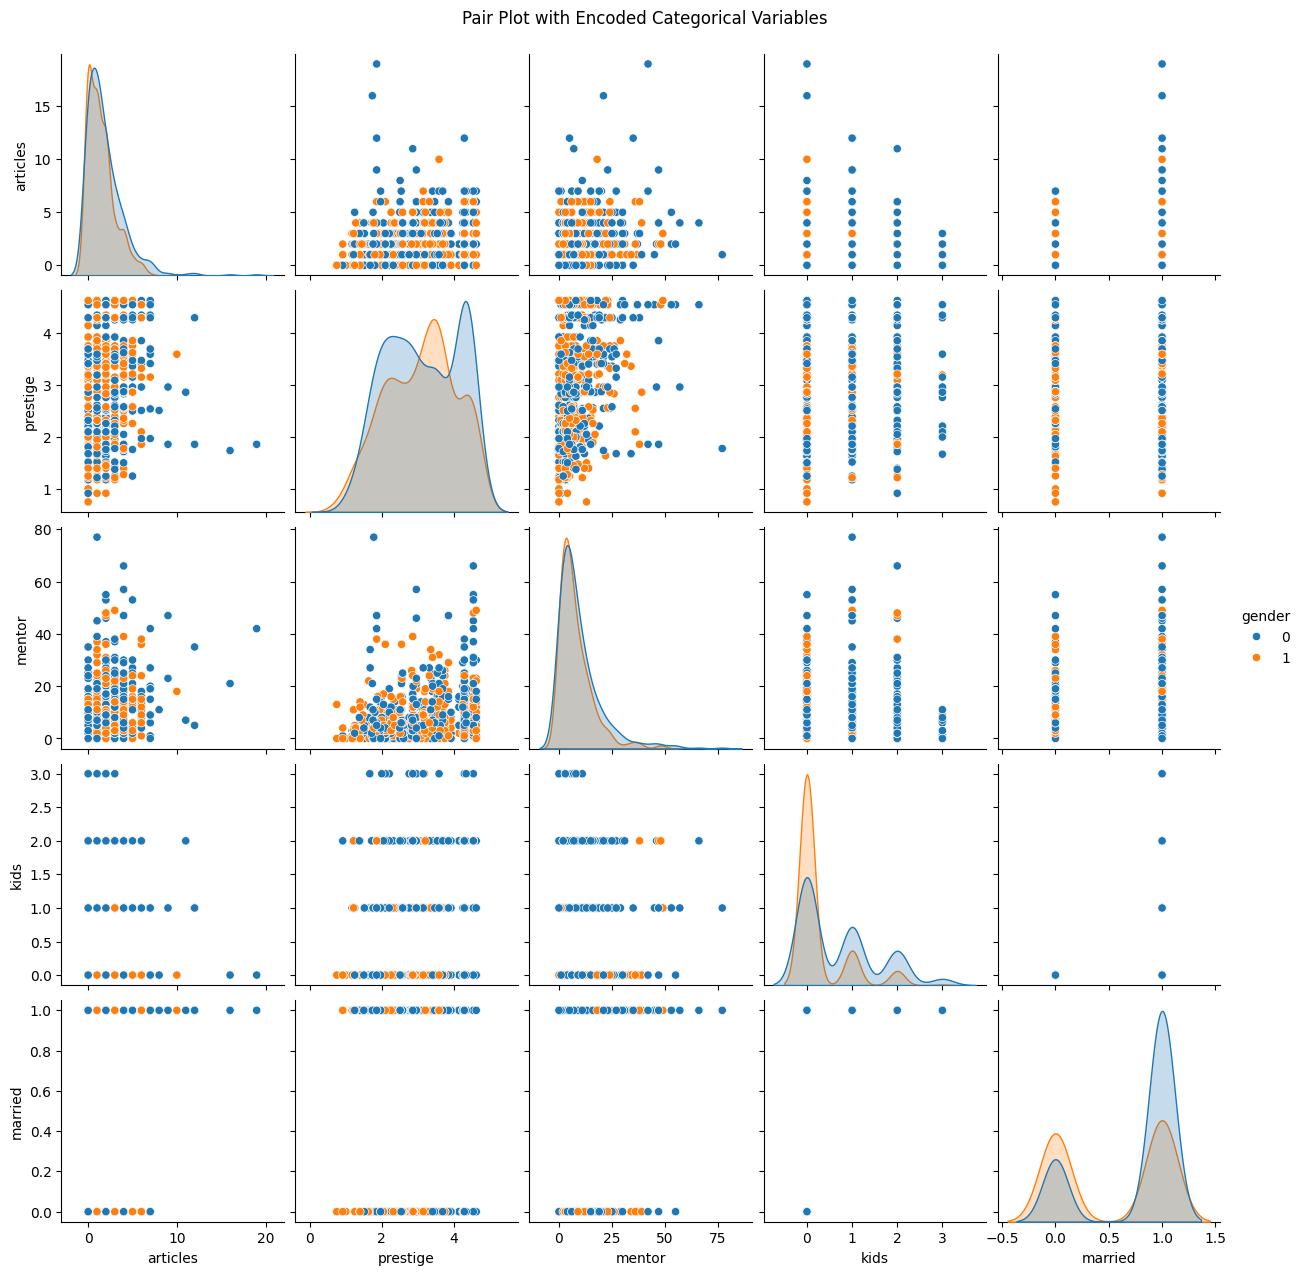

In [ ]:

# Pairplot with encoded data
sns.pairplot(encoded_data[['articles', 'prestige', 'mentor', 'kids', 'gender', 'married']], hue='gender')
plt.suptitle('Pair Plot with Encoded Categorical Variables', y=1.02)
plt.show()


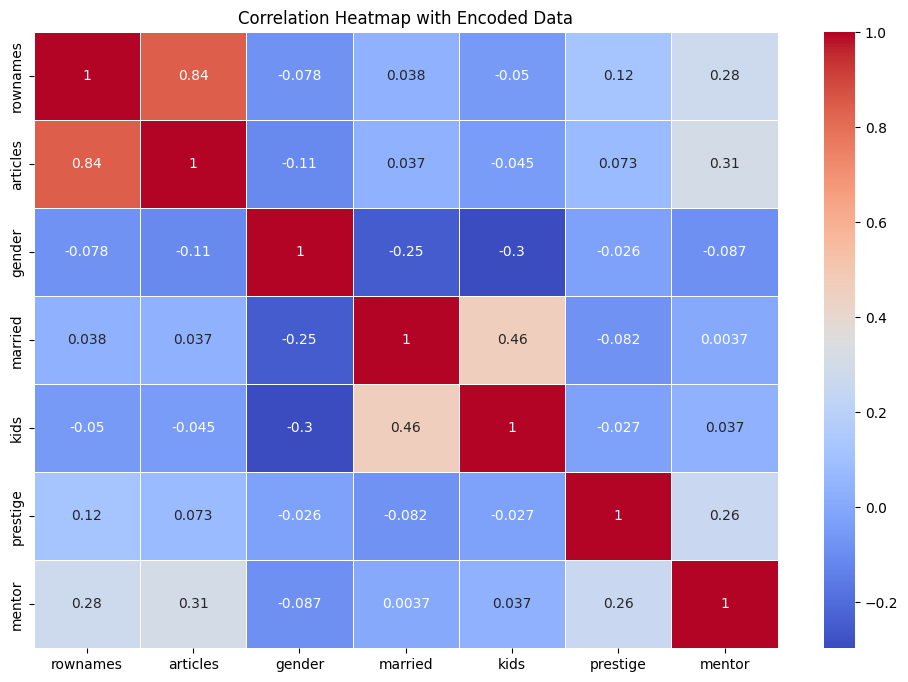

In [ ]:

# Heatmap with encoded data
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Encoded Data')
plt.show()


## Conclusion
This notebook provides a detailed analysis and visualization techniques while handling non-numeric columns by encoding them appropriately.

<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_5_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PhD Publications Dataset Clustering Analysis

This notebook contains a clustering analysis of the PhD Publications dataset, exploring multiple clustering algorithms and visualization techniques.

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Step 1: Data Loading and Preprocessing

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)
# Select numeric columns for clustering
numeric_data = data[['articles', 'kids', 'prestige', 'mentor']]
numeric_data.head()


articles  kids  prestige  mentor
0         0     0      2.52       7
1         0     0      2.05       6
2         0     0      3.75       6
3         0     1      1.18       3
4         0     0      3.75      26

## Step 2: Data Scaling

In [ ]:

# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


## Step 3: K-Means Clustering

In [ ]:

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate cluster means
cluster_means = data.groupby('Cluster')[['articles', 'kids', 'prestige', 'mentor']].mean()
cluster_means


articles      kids  prestige     mentor
Cluster                                         
0        1.166038  1.475472  2.932585   6.347170
1        3.642157  0.303922  3.862451  19.754902
2        1.114350  0.000000  2.857108   5.179372

## Step 4: Cluster Visualization

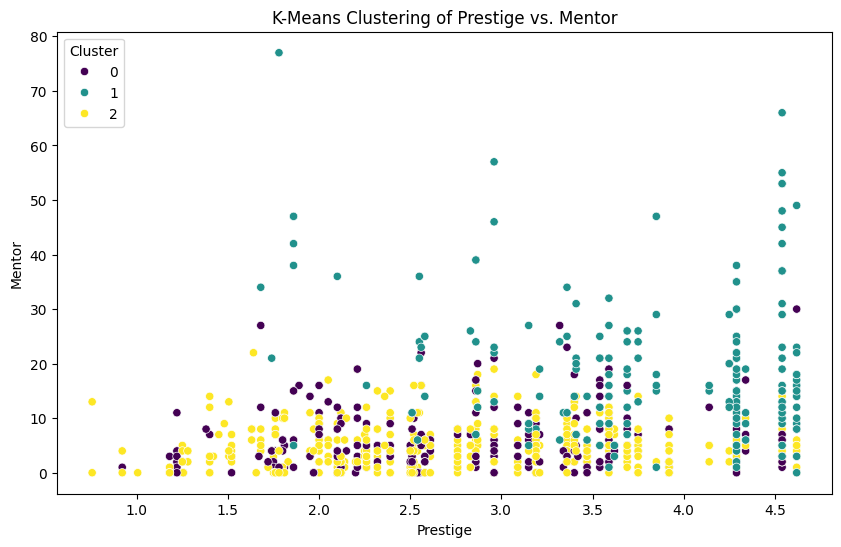

In [ ]:

# Visualize clusters for two features (e.g., prestige vs. mentor)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 5: Cluster Mean Heatmap

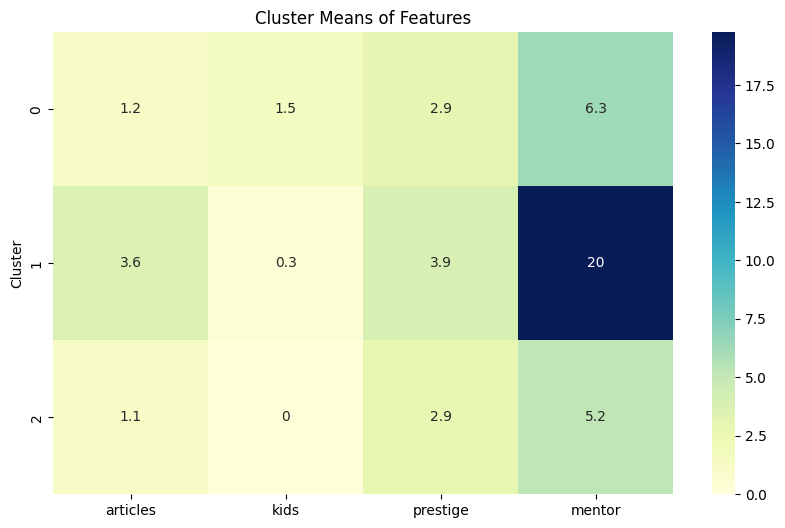

In [ ]:

# Heatmap of cluster means
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Means of Features")
plt.show()


## Step 6: Spectral Clustering

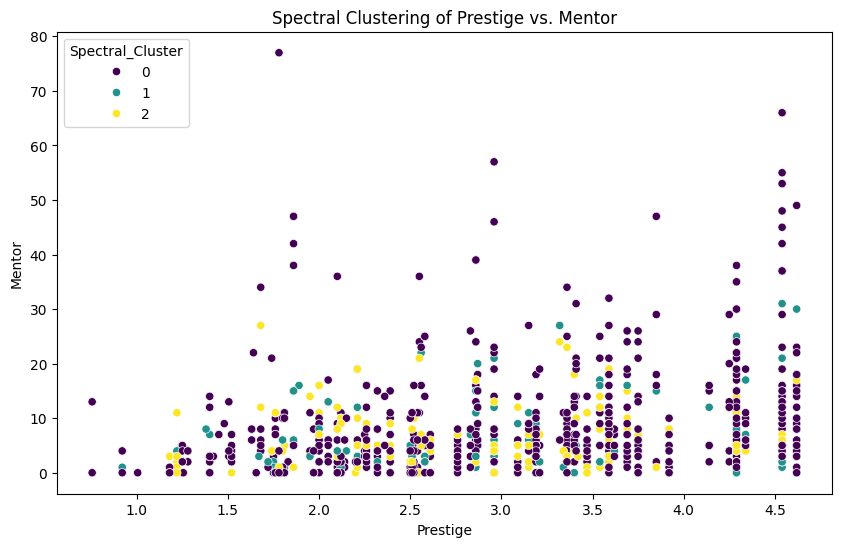

In [ ]:

from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# Visualize Spectral Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Spectral_Cluster', palette='viridis')
plt.title("Spectral Clustering of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 7: Minimum Spanning Tree (MST) Clustering

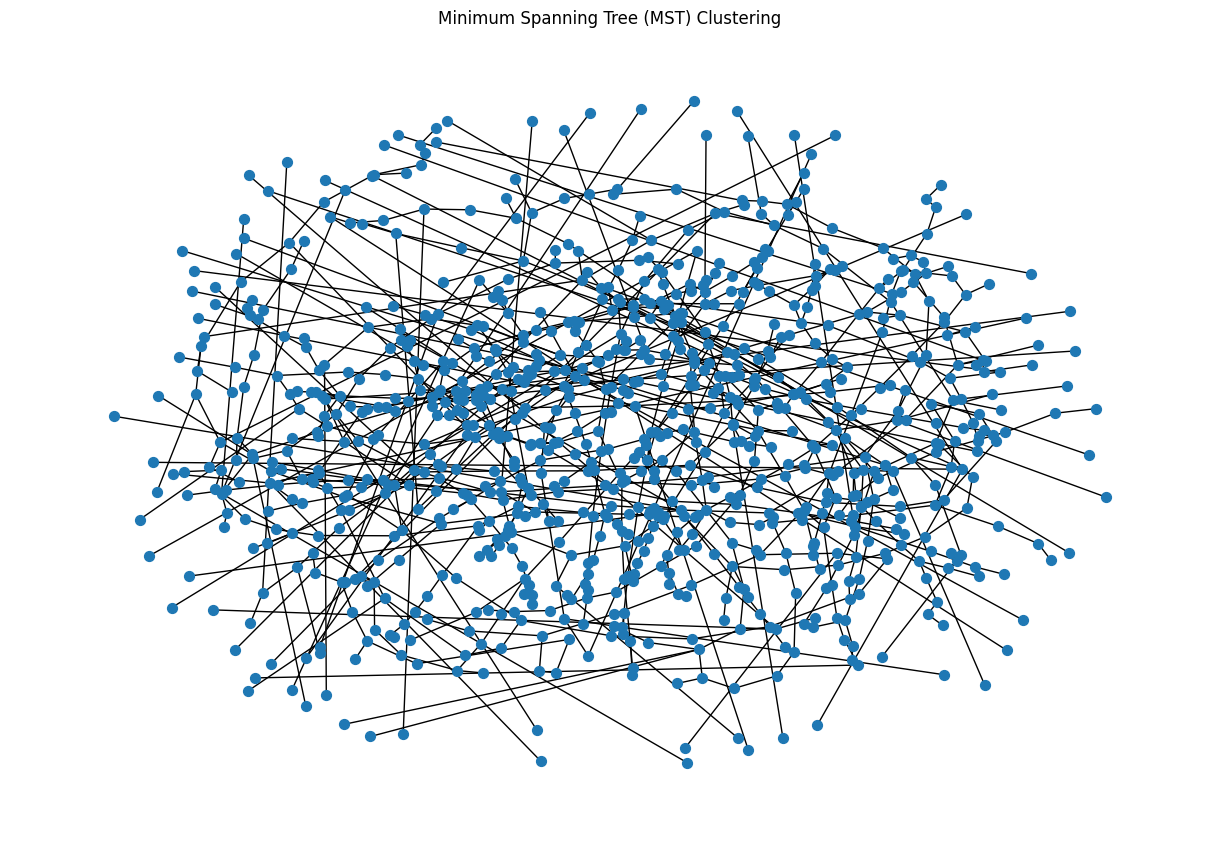

In [ ]:

import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances

# Calculate pairwise distances
distances = euclidean_distances(scaled_data)

# Create MST graph
G = nx.Graph()
for i in range(len(distances)):
    for j in range(i + 1, len(distances)):
        G.add_edge(i, j, weight=distances[i][j])

# Compute MST
mst = nx.minimum_spanning_tree(G)

# Visualize MST
plt.figure(figsize=(12, 8))
nx.draw(mst, with_labels=False, node_size=50, font_size=12)
plt.title("Minimum Spanning Tree (MST) Clustering")
plt.show()


## Step 8: Expectation-Maximization (Gaussian Mixture Model) Clustering

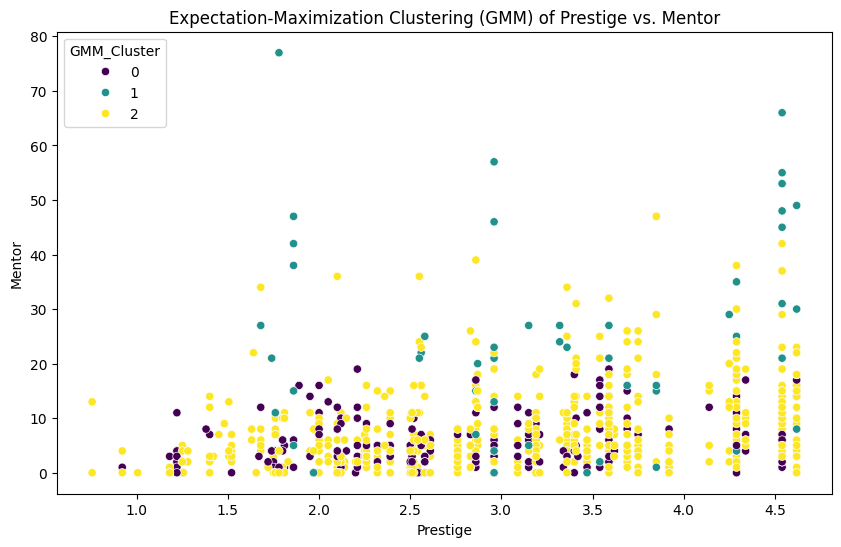

In [ ]:

from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# Visualize GMM Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='GMM_Cluster', palette='viridis')
plt.title("Expectation-Maximization Clustering (GMM) of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 9: Hierarchical Agglomerative Clustering

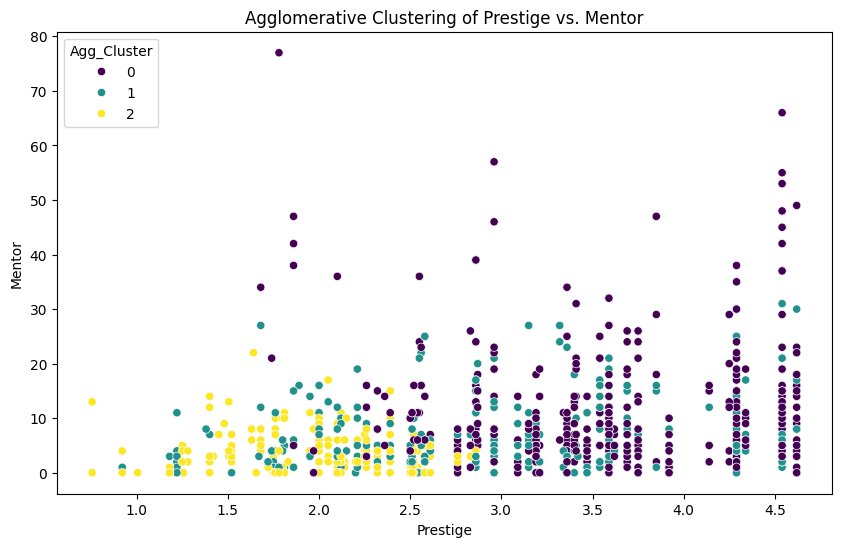

In [ ]:

from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)

# Visualize Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Agg_Cluster', palette='viridis')
plt.title("Agglomerative Clustering of Prestige vs. Mentor")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.show()


## Step 10: Outlier Detection using K-Means

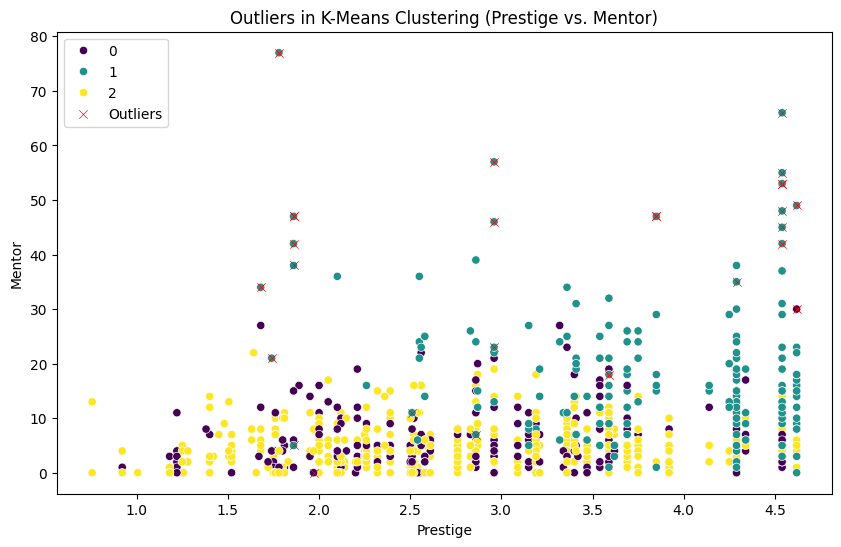

In [ ]:
# Outlier detection based on distance from cluster centroid
distances_to_centroid = kmeans.transform(scaled_data).min(axis=1)
outlier_threshold = distances_to_centroid.mean() + 2 * distances_to_centroid.std()
outliers = data[distances_to_centroid > outlier_threshold]

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prestige', y='mentor', hue='Cluster', palette='viridis')
sns.scatterplot(data=outliers, x='prestige', y='mentor', color='red', marker='x', label='Outliers')
plt.title("Outliers in K-Means Clustering (Prestige vs. Mentor)")
plt.xlabel("Prestige")
plt.ylabel("Mentor")
plt.legend()
plt.show()


<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_6_Complete_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6: Dimensionality Reduction

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

### Load Dataset and Preprocess

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the PhD Publications dataset
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)

# Selecting numeric columns for dimensionality reduction
numeric_data = data[['articles', 'kids', 'prestige', 'mentor']]

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(numeric_data)


## 6.1 Principal Component Analysis (PCA)

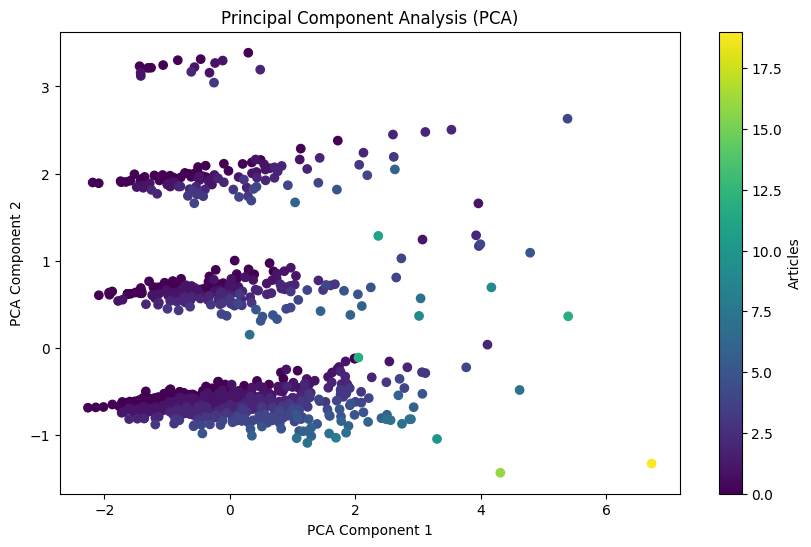

In [ ]:

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['articles'], cmap='viridis')
plt.title("Principal Component Analysis (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Articles")
plt.show()


## 6.2 Singular Value Decomposition (SVD)

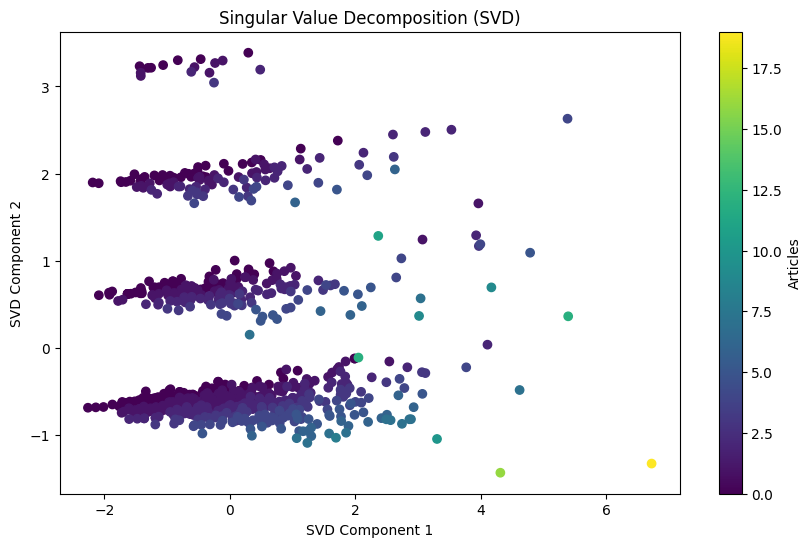

In [ ]:

from sklearn.decomposition import TruncatedSVD

# Perform SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Visualize SVD results
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=data['articles'], cmap='viridis')
plt.title("Singular Value Decomposition (SVD)")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.colorbar(label="Articles")
plt.show()


## 6.3 Factor Analysis (FA)

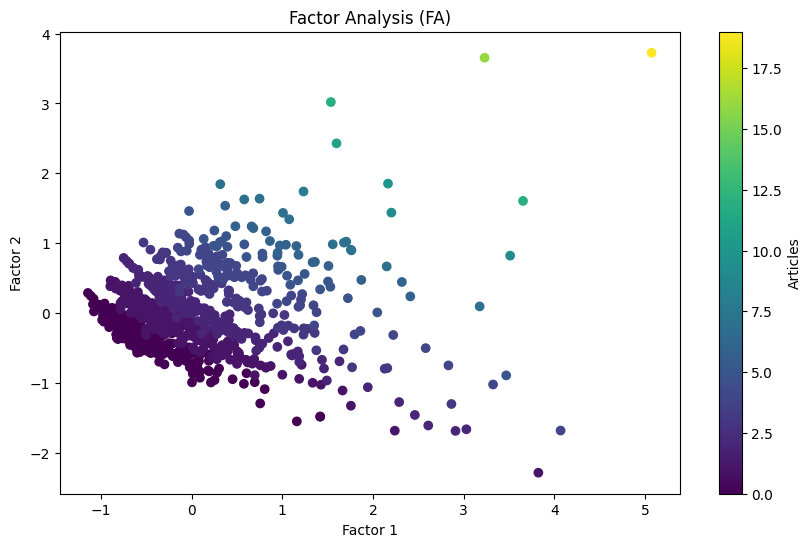

In [ ]:

from sklearn.decomposition import FactorAnalysis

# Perform Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X)

# Visualize Factor Analysis results
plt.figure(figsize=(10, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=data['articles'], cmap='viridis')
plt.title("Factor Analysis (FA)")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.colorbar(label="Articles")
plt.show()


## 6.4 Non-Linear Methods

### 6.4.1 Multidimensional Scaling (MDS)

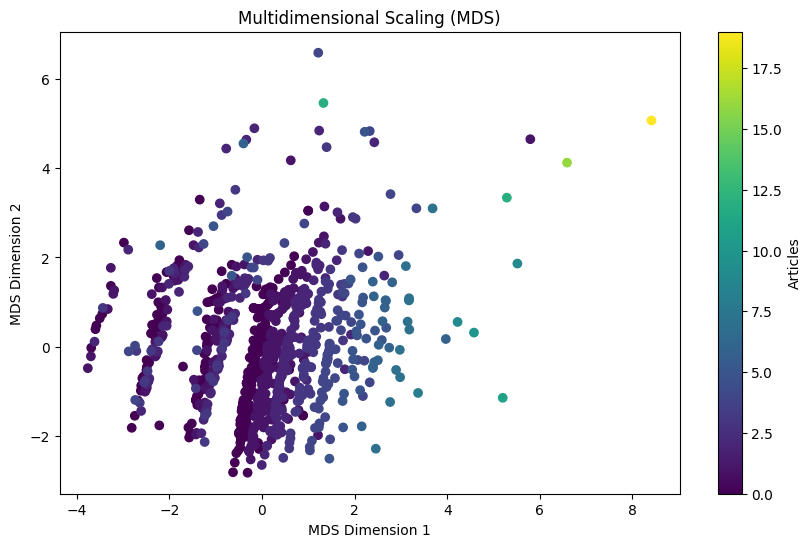

In [ ]:

from sklearn.manifold import MDS

# Perform MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Visualize MDS results
plt.figure(figsize=(10, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=data['articles'], cmap='viridis')
plt.title("Multidimensional Scaling (MDS)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.colorbar(label="Articles")
plt.show()


### 6.4.2 Manifold Learning (t-SNE)

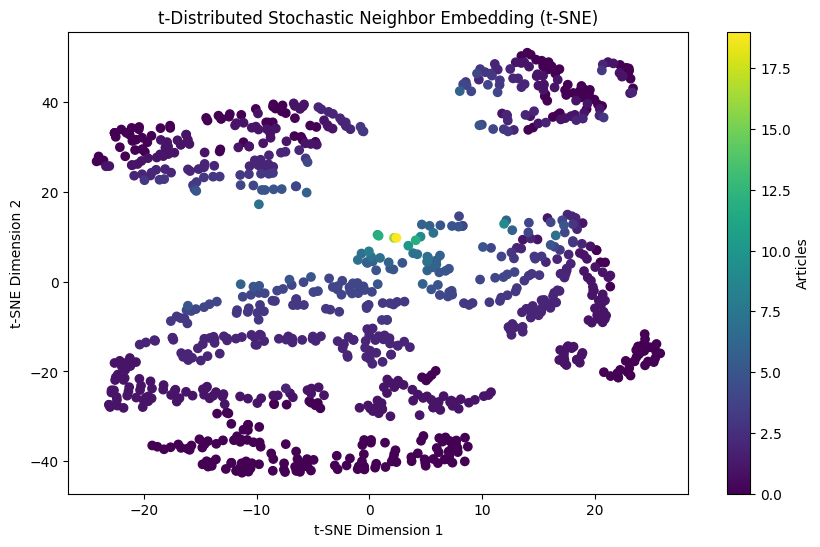

In [ ]:

from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['articles'], cmap='viridis')
plt.title("t-Distributed Stochastic Neighbor Embedding (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Articles")
plt.show()


### 6.4.3 Self-Organizing Maps (SOM)

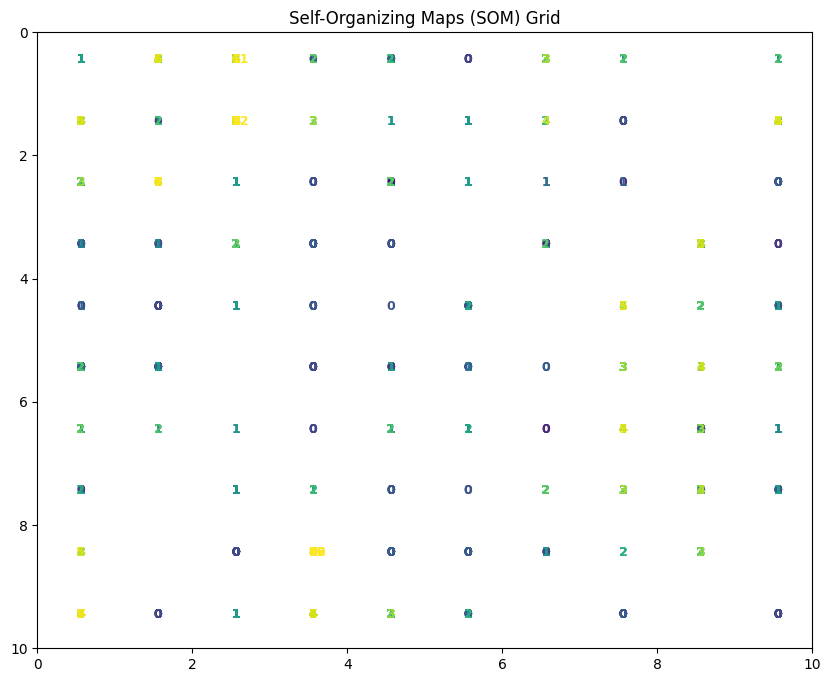

In [ ]:
# Import necessary libraries
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the SOM grid
som_grid_rows, som_grid_cols = 10, 10  # Adjust grid size as needed

# Initialize and train the SOM
som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

# Visualize the SOM grid
plt.figure(figsize=(10, 8))
for i, x in enumerate(X):
    # Get the winning neuron (best matching unit) for each data point
    winning_neuron = som.winner(x)
    # Plot each data point according to its winning neuron position
    plt.text(winning_neuron[0] + 0.5, winning_neuron[1] + 0.5, str(data['articles'].iloc[i]),
             color=plt.cm.viridis(i / len(X)), fontdict={'weight': 'bold', 'size': 9})

plt.title("Self-Organizing Maps (SOM) Grid")
plt.xlim([0, som_grid_rows])
plt.ylim([0, som_grid_cols])
plt.gca().invert_yaxis()  # Invert y-axis for better alignment
plt.show()


<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_7_Model_Development_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 7: Model Development and Evaluation

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Step 1: Linear Regression Model Construction

In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the PhD Publications dataset
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)

# Select features and target variable for linear regression
X = data[['kids', 'prestige', 'mentor']]
y = data['articles']

# Construct and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Print model coefficients
print("Intercept:", linear_reg.intercept_)
print("Coefficients:", linear_reg.coef_)


Intercept: 1.2659002662612309
Coefficients: [-0.14338285 -0.01757134  0.06301979]


## Step 2: Model Prediction and Evaluation

In [ ]:

# Make predictions
y_pred = linear_reg.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Interpretation
print("\nInterpretation of Metrics:")
print(" - Mean Squared Error (MSE) is a measure of the average squared difference between actual and predicted values. Lower MSE indicates better model performance.")
print(" - R-squared (R2) score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 score closer to 1 indicates a better fit.")


Mean Squared Error (MSE): 3.346875629381215
R-squared (R2) Score: 0.09682727869620777

Interpretation of Metrics:
 - Mean Squared Error (MSE) is a measure of the average squared difference between actual and predicted values. Lower MSE indicates better model performance.
 - R-squared (R2) score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 score closer to 1 indicates a better fit.


## Step 3: Visualize Actual vs Predicted Values

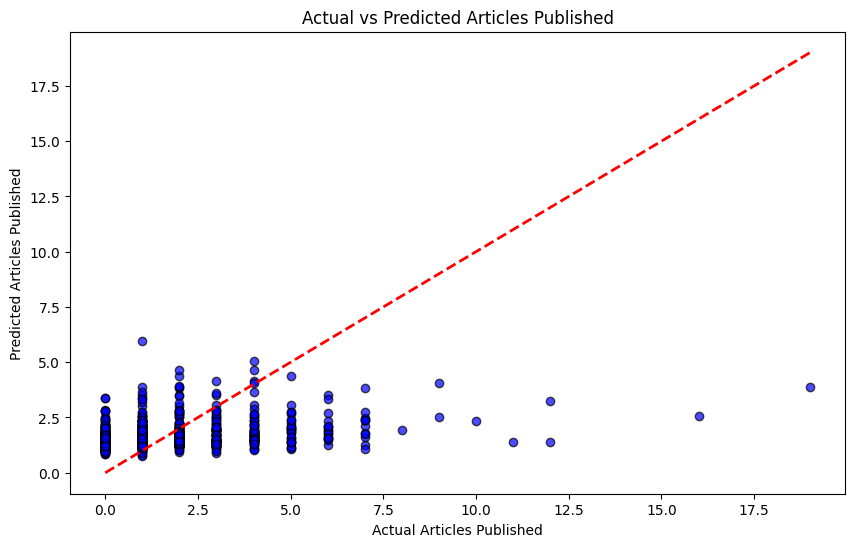

In [ ]:

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Articles Published")
plt.ylabel("Predicted Articles Published")
plt.title("Actual vs Predicted Articles Published")
plt.show()


## Step 4: Understanding Accuracy in Linear Regression


### Interpreting Model Accuracy
In linear regression, accuracy is commonly interpreted through metrics such as:

- **Mean Squared Error (MSE)**: Represents the average squared difference between actual and predicted values. It indicates the error magnitude, with lower values showing better accuracy.
- **R-squared (R2) Score**: Measures the proportion of variance in the dependent variable that is predictable from the independent variables. An R2 closer to 1 means the model fits the data well.


## Step 5: Understanding Reinforcement Learning


### Reinforcement Learning vs. Supervised Learning

- **Supervised Learning**: The model learns from labeled data with input-output pairs. It predicts outputs based on training on these pairs. Applications include tasks like classification and regression, such as email spam detection or image classification.

- **Reinforcement Learning (RL)**: In RL, an agent learns by interacting with an environment. Instead of labeled data, the agent receives rewards or penalties based on its actions and learns to maximize cumulative rewards. This setup enables the agent to learn optimal strategies for a goal, making RL suitable for decision-making in complex, dynamic environments.

### Key Concepts in Reinforcement Learning
- **Agent**: The learner or decision-maker, such as a robot or software program.
- **Environment**: Everything outside the agent that it interacts with.
- **Actions**: Moves the agent can make within the environment.
- **Rewards**: Feedback from the environment in response to the agent's actions, guiding future decisions.

### Applications of Reinforcement Learning

1. **Game Playing**: RL agents have been trained to play and excel at games (e.g., AlphaGo, Dota 2) by learning optimal strategies through trial and error.
2. **Robotics**: RL enables robots to learn tasks such as walking, manipulating objects, or navigating environments autonomously.
3. **Finance**: RL-based trading agents learn strategies to maximize returns in stock trading or portfolio management.
4. **Recommendation Systems**: RL is used to enhance recommendation systems by learning to optimize long-term user engagement based on interaction patterns.
5. **Self-driving Cars**: RL plays a role in autonomous vehicle systems, allowing cars to learn from simulations to make safe driving decisions.
